# Assignment 1

## Overview of the assignment contents
- [General](#general)
    - [Formalia](#formalia)
    - [Settings for plots](#settings)
    - [General code](#generalcode)
    - [Basic formatting & preprocessing](#basicformatting)
- [Part 1: Visualizing patterns in the data](#part1)
- [Part 2: Fundamentals of data visualization](#part2)
- [Part 3: Different types of visualization from DAOST](#part3)
- [Part 4: Visualizing geo-data](#part4)
- [Part 5: Errors in the data](#part5)
- [Reference List](#referencelist)

<a id='general'></a>
## General
This is the general part for the assignment to set the plots, include general code and preprocessing that will be useful throughout the notebook.

<a id='formalia'></a>
## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2022/wiki/Assignment-1-and-2) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 28th, 2022 at 23:59. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 7th, 2022 at 23:59.

**Crime data used in this notebook**: [link to downloading the dataset](https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD)

## Settings for plots

For plotting all plots without scrolling Stack Overflow (2017).

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings("ignore")

<a id='generalcode'></a>
## General code
This section contains general code such as the import of libraries and functions that will be used throughout the whole workbook which aims at writing code precisely and efficiently.

In [ ]:
#import the necessary libraries for the exercises
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap
%matplotlib inline

# import the necessary data into pandas dataframes
df_crime = pd.read_csv('https://data.sfgov.org/api/views/tmnf-yvry/rows.csv')
df_women_step_bmi = pd.read_csv('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv')
df_men_step_bmi = pd.read_csv('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv')

In [3]:
import pandas as pd
df_crime = pd.read_csv('https://data.sfgov.org/api/views/tmnf-yvry/rows.csv')
df_crime.shape

(2129525, 35)


<a id='basicformatting'></a>
## Basic formatting & preprocessing
This section contains general code for basic formatting of the columns in `df_crime`.

In [ ]:
# convert the date and time to datetime
df_crime['Date'] = pd.to_datetime(df_crime['Date'])
df_crime['Time'] = pd.to_datetime(df_crime['Time'])
# Year column
df_crime['Year'] = pd.DatetimeIndex(df_crime['Date']).year
# Month column
df_crime['Month'] = pd.DatetimeIndex(df_crime['Date']).month
# hour columns
df_crime['Hour'] = pd.DatetimeIndex(df_crime['Time']).hour
# minute columns
df_crime['Minute'] = pd.DatetimeIndex(df_crime['Time']).minute

# extract further helpful information from the Date and Time for the exercises
df_crime['DayOfWeek_int'] = pd.DatetimeIndex(df_crime['Date']).dayofweek
df_crime['DayOfWeek'] = pd.DatetimeIndex(df_crime['Date']).day_name()
df_crime['HourOfWeek'] = df_crime['DayOfWeek_int'] * 24 + (df_crime['Hour'] + 1)

<a id='part1'></a>
## Part 1: Visualizing patterns in the data

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 2. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

We look only at the focus-crimes in the exercise below.

In [ ]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
# create a list of focuscrimes
focuscrimes = list(focuscrimes)
# create a filtered dataset with the focuscrimes only
df_focuscrimes = df_crime[df_crime.Category.isin(focuscrimes)]

> *Exercise*: 
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Make your own version of the plot and comment your results.
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight. Visualize and comment your results.
> * *Spatial patterns*. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical:
>    - For each district plot the ratio `P(crime|district)/P(crime)` for the 14 focus crimes (follow and *show* the steps in Week 2 Ex. 2.2 for success).
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

### Weekly patterns
Core steps:
1. Extract weekly data `datetime.strftime("%w")`
2. Restrict to entire years, we filter out data in 2018
3. Group the data by category and weekday and count crime occurences on those days
4. Plot bar chart and DIY edge color `plt.bar(edgecolor='')`

In [ ]:
# create a new column to store corresponding day of week
weeks = df_crime['Date'].apply(lambda x: x.strftime("%w"))
df_crime['Week'] = weeks

In [ ]:
# Restrict to entire years so we filter out data in 2018
# create a new dataframe grouped by crime categories, weekdays and their occurences
df_weekly = pd.DataFrame({'count': df_crime[df_crime['Year']!=2018].groupby('Week').Category.value_counts()})
df_weekly = df_weekly.reset_index('Category')

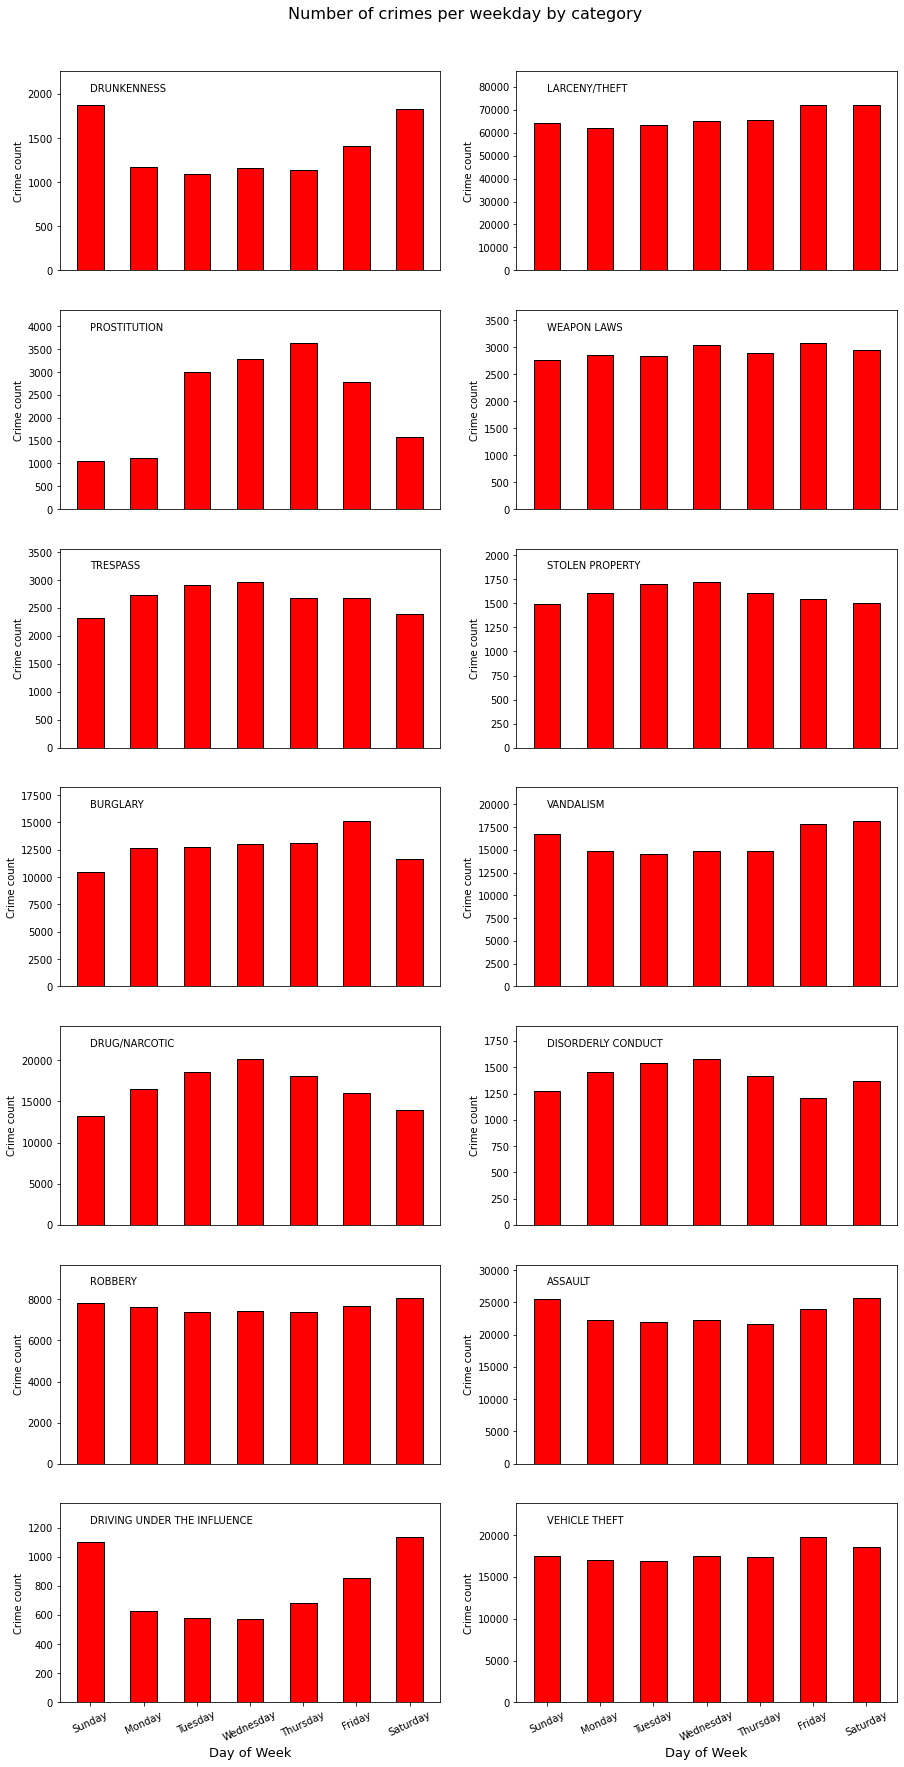

In [ ]:
plt.figure(figsize=(15,30))

for i in range(len(focuscrimes)):
    plot_index = i+1
    plt.subplot(7, 2, plot_index)
    crime = df_weekly[df_weekly['Category']==focuscrimes[i]] # subplot posistion
    crime_categories = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] # x aixs values
    crime_counts = crime['count'].values # y axis values
    
    plt.bar(crime_categories,crime_counts,color='#FF0000',edgecolor='black',width=0.5)
    # lengthen y axis so to leave some space for annotation 
    plt.ylim(0,crime_counts.max()*1.2) 

    # add annotation text
    x0, xmax = plt.xlim()
    y0, ymax = plt.ylim()
    # set a fixed text posistion according x,y-axis limit
    data_width = xmax - x0
    data_height = ymax - y0
    plt.text(x0 + data_width * 0.08, y0 + data_height * 0.9, focuscrimes[i], horizontalalignment='left', fontsize=10)
    # add ylabel
    plt.ylabel(ylabel='Crime count',fontsize=10)
    # rotate xticks
    plt.xticks(rotation=25)
    
    if i > len(focuscrimes)-3:
        plt.xlabel('Day of Week',fontsize=13)
    else:
        plt.xticks([]) # only show xticks at the last 2 graphs

plt.suptitle('Number of crimes per weekday by category', size=16, y=0.91)
plt.show()

#### Findings
Overall, different categories of crimes have special time characteristics, mid-week behaviours or weekend behaviours. Most of crime cases have fairly equal distribution on weekdays. 

Special crimes like Driving under influence, Drunkenness occurs most on weekends, which probably because on weekends people don't need to work so they have a higher chance to go to a bar and drink. Surprisingly, Prostituition, Drug/Narcotic frequently occurs on weekdays rather than weekends.

To be specific, Prostituition often happended after Monday, reaching its peak on Thursday (however further investigation shows that this is due to an outlier which will be further explained in [Part 5](#part5)) while Wednesday is the peak day for Drug/Narcotic deals.

### Weekly-Hourly pattern(168 hours)
Core steps:
1. Group the data by crime category and weekly-hourly occurences(filter out year 2018 as the same)
2. Define a function to rename x-axis by the day of the week and its 24 hours 
3. Plot bar chart and add an average line for better inspection

In [ ]:
df_hr_wk = pd.DataFrame({'count': df_crime[df_crime['Year']!=2018].groupby(['Week','Hour']).Category.value_counts()})
df_hr_wk = df_hr_wk.reset_index('Category')

In [ ]:
def adjust_index(i):
    if i[0] == '0':
        day = 'Sunday'
    elif i[0] == '1':
        day = 'Monday'
    elif i[0] == '2':
        day = 'Tuesday'
    elif i[0] == '3':
        day = 'Wednesday'
    elif i[0] == '4':
        day = 'Thursday'
    elif i[0] == '5':
        day = 'Friday'
    else:
        day = 'Saturday'
    
    day_hr = day+' '+str(i[1])
    
    return day_hr

<a id='168-hour-pattern'></a>

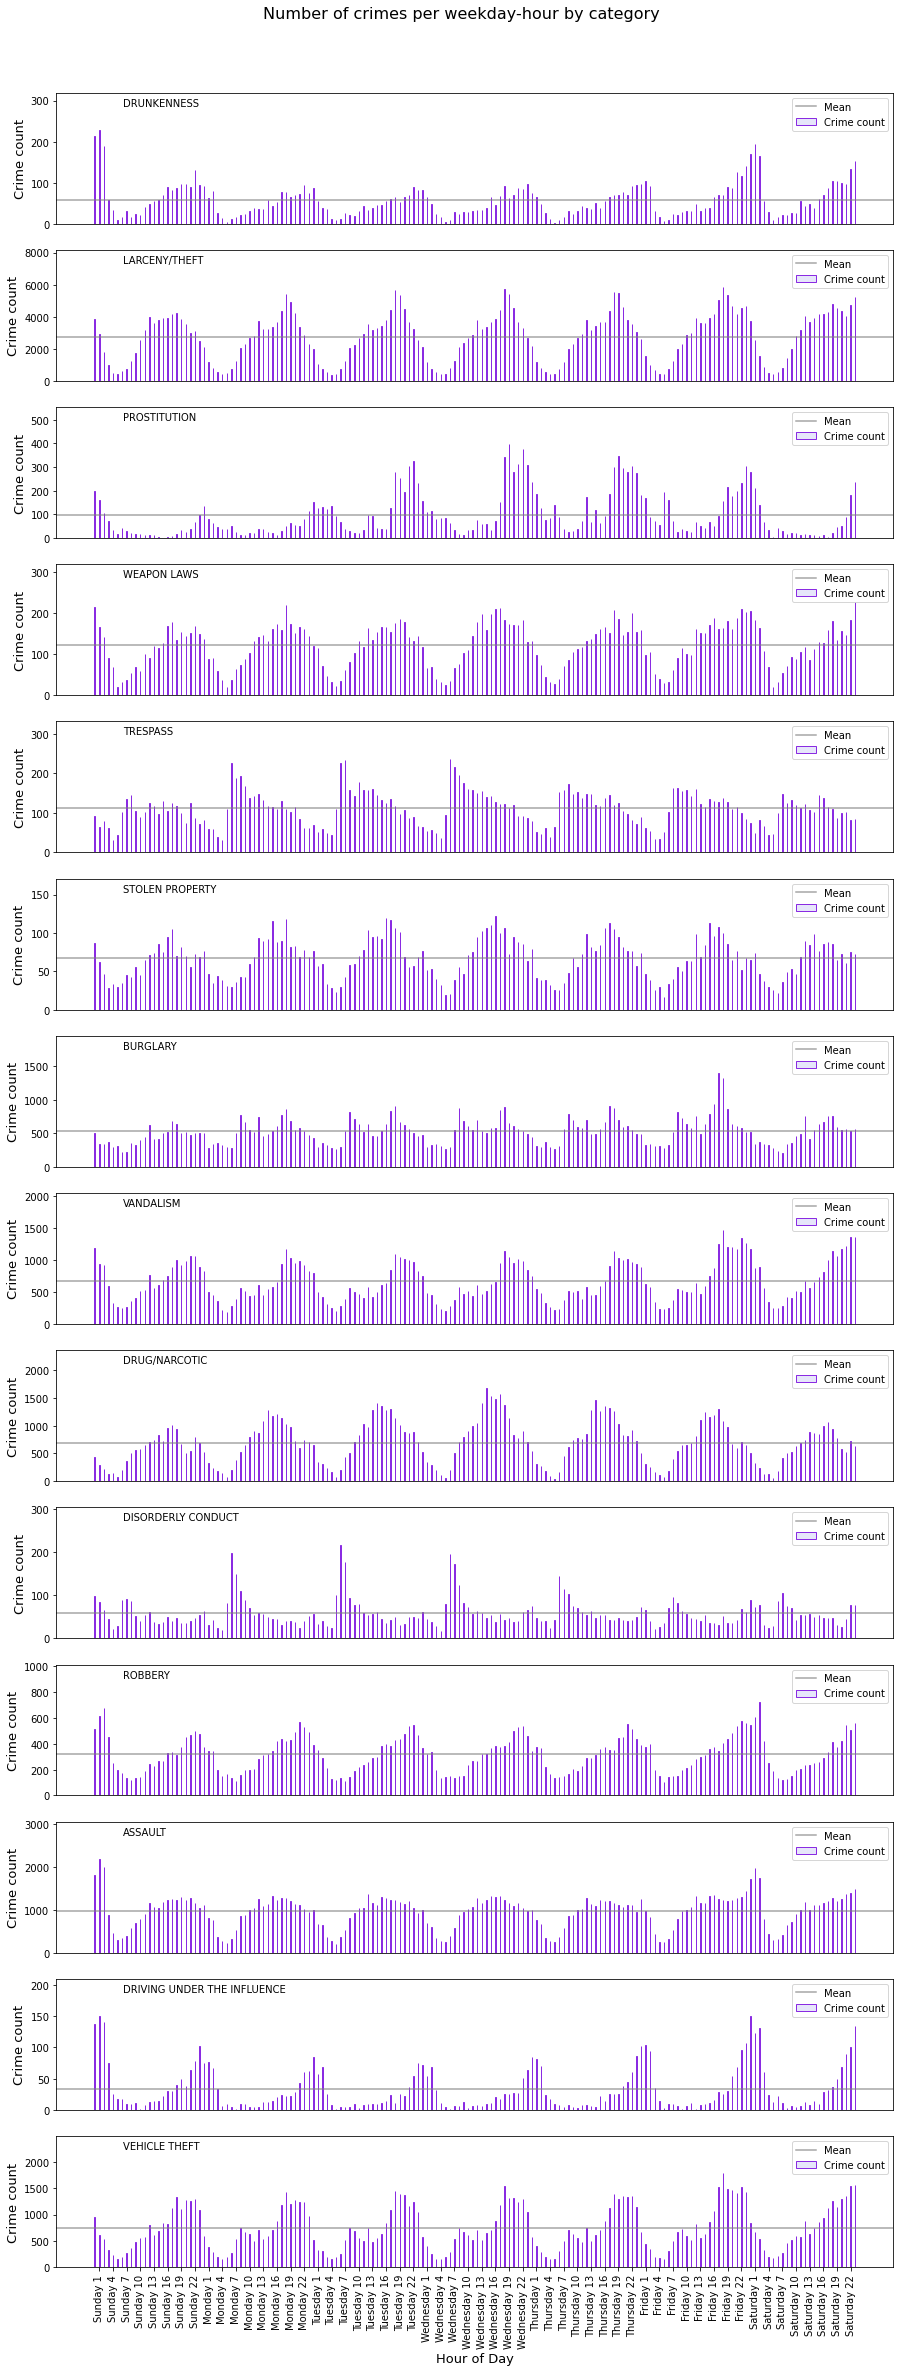

In [ ]:
plt.figure(figsize=(15,40))

for i in range(len(focuscrimes)):
    plot_index = i+1
    plt.subplot(14, 1, plot_index) # subplot posistion
    crime = df_hr_wk[df_hr_wk['Category'] == focuscrimes[i]]
    crime_categories = crime.index.map(adjust_index) # x aixs values
    crime_counts = crime.values[:,1] # y axis values
    
    plt.bar(crime_categories, crime_counts, color='#E6E6FA', edgecolor='blueviolet', width=0.1, label='Crime count')
    # draw an extra average line for better understanding of our data
    plt.axhline(df_hr_wk[df_hr_wk.Category == focuscrimes[i]]['count'].sum()/168, alpha=0.7, color='grey', label='Mean')
    plt.ylim(0,crime_counts.max()*1.4) # lengthen y axis

    # add annotation text
    x0, xmax = plt.xlim()
    y0, ymax = plt.ylim()
    data_width = xmax - x0
    data_height = ymax - y0
    plt.text(x0 + data_width * 0.08, y0 + data_height * 0.9, focuscrimes[i], horizontalalignment='left', fontsize=10)
    # add ylabel
    plt.ylabel(ylabel='Crime count',fontsize=13)
    # rotate xticks
    plt.xticks(range(1,len(crime_counts),3),rotation = 90)
    
    if i == len(focuscrimes)-1:
        plt.xlabel('Hour of Day', fontsize=13)
    else:
        plt.xticks([]) # only show xticks at the last graph
        
    plt.legend(loc='upper right')
    
plt.suptitle('Number of crimes per weekday-hour by category', size=16, y=0.91)
plt.show()

#### Findings:
Based on the visualizations, we can roughly divide them into 3 types of time patterns.

1. Daytime frequent crime. Larceny/theft, drug violations, Weapon laws, Drug/Narcotic, Trespass, Stolen Property were slightly more likely to happen while the sun was out, most before 19 pm.

  - Larceny/theft account for the most of police incidents and active between 13 pm to 21 pm, often peaked around 16 to 18 o'clock.
  - Weapon laws and Drug/Narcotic have very similar pattern. This might be they are both related to gang activies.
  - Trespass was often in the early morning(before dawn) as the U.S. Deportment of Transportotion revealed in the report [FATAL TRESPASSER STRIKES IN THE UNITED STATES: 2012 – 2017.](https://railroads.dot.gov/sites/fra.dot.gov/files/2020-01/Fatal%20Trespasser%20Strikes.pdf) and it peaked from Monday to Wednesday.


2. [Night time crime](https://www.securitymagazine.com/articles/90384-murder-robbery-and-driving-while-impaired-happen-at-night).  For example, Driving under influence, Drunkness, Robbery, Vehicle Theft etc.
  - After 22 pm on weekends(including Friday), DUI police incidents happened the most then.
  - Violent crimes like Robbery and Vehicle Theft occur most often at night, especially on Friday, while Vehicle Theft occurs more than Robbery. 


3. Other crimes and interesting findings.

  - Disorderly conduct often occurs on work days, especially Monday morning 6 am to 10 am. 
  - Assault often occurs on daytime atfter 16 pm on work days, in contrast to more cases in weekend evenings. Assault peaked at 
  - Prostituition occurs more on weekdays than weekends, and usually during 18 pm to 00 pm.

### Spatial patterns
Core steps:   
1. Group district and crime categories and count their occurences
2. Calculate P(crime|district)/P(crime)
3. Plot bar charts

In [ ]:
y = df_crime['Category'].value_counts().values
x = df_crime['Category'].value_counts().index

In [ ]:
crimeDistrict = pd.DataFrame(df_crime[['PdDistrict','Category']].groupby('PdDistrict').Category.\
    value_counts().reset_index(name='count'))

In [ ]:
plc_districts = df_crime[df_crime['PdDistrict'].notna()]['PdDistrict'].unique()

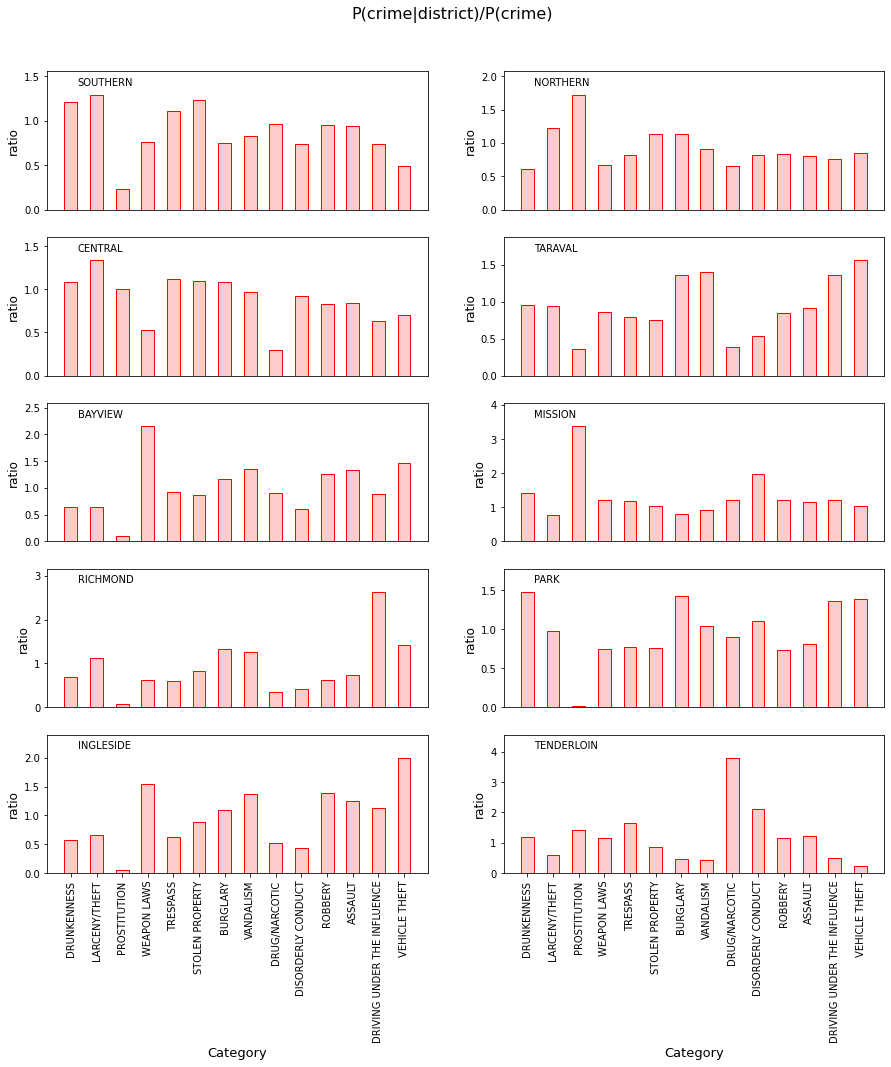

In [ ]:
plt.figure(figsize=(15,30))

for i in range(len(plc_districts)):
    plot_index = i+1
    plt.subplot(10, 2, plot_index) # subplot posistion
    district = crimeDistrict[(crimeDistrict['PdDistrict']==plc_districts[i])&(crimeDistrict['Category'].isin(focuscrimes))]
    
    # calculate probabilities
    crime = df_crime['Category'].value_counts()[focuscrimes]
    p_crime = crime/crime.sum()
    district.index = district['Category']
    cgivend = district.loc[focuscrimes]['count']
    p_cgivend = cgivend/cgivend.sum()
    ratio = p_cgivend/p_crime
    
    # plot
    plt.bar(ratio.index,ratio.values,color='#FFCCCB',edgecolor='#FF0000',width=0.5)
    plt.ylim(0,ratio.max()*1.2) # lengthen y axis

    # add annotation text
    x0, xmax = plt.xlim()
    y0, ymax = plt.ylim()
    data_width = xmax - x0
    data_height = ymax - y0
    plt.text(x0 + data_width * 0.08, y0 + data_height * 0.9, plc_districts[i], horizontalalignment='left', fontsize=10)
    # add ylabel
    plt.ylabel(ylabel='ratio',fontsize=12)
    
    if i > len(plc_districts)-3:
        plt.xlabel('Category',fontsize=13)
        plt.xticks(rotation=90)
    else:
        plt.xticks([]) # only show xticks at the last 2 graphs

plt.suptitle('P(crime|district)/P(crime)', size=16, y=0.91)
plt.show()

#### Findings

1. Prostitution barely occured in districts BAYVIEW, PARK, INGLESIDE, RICHMOND. \
Richmond is portrayed as a district with a lot of influences from other countries (from China, Russia and Ireland) and religions (catholic and orthodox churches). The district has a lot of schools, parks and avenues. (Wikipedia, 2022b) From the picture [here](https://upload.wikimedia.org/wikipedia/commons/e/e9/Sea_Cliff_and_Richmond_districts_and_Lands_End%2C_San_Francisco.jpg)
one also has the impression that the district is a structured and neat neighborhood. 
 
 This is consistent with the very low prostitution ratio in this district. The high ratio of driving under the influence can not be explained by the article as there is no indication of e.g. a lot of pubs nor is it appearing when googling for crime in this district which might indicate that it might be a not well known problem of this neighborhood.
 

2. Drug and Disordered conduct are the crime categories with the highest ratio in TENDERLOIN. \
The New York Times (Fuller, 2018) published an article on the "Life on the Dirtiest Block in San Francisco" in Tenderloin as can be seen in the picture below pointing out that this district is drug hot spot and a place for many homeless people. \
![image](https://static01.nyt.com/images/2018/10/09/us/09sanfrancisco-1-print/00dirtystreets-02-superJumbo.jpg)

 The Wikipedia article on this also states that there is a lot of drug dealing and using on the streets (Wikipedia, 2022c) which is consistent with Tenderloin having the highest crime ratio in the category Drug/Narcotic as shown in the last plot on the right above. 

 However, the Wikipedia article also mentions robbery and vehicle theft as common crimes in the "high-crime neighborhood" (Wikipedia, 2022c) while these crime categories do not stand out in the analysis above. 
 

3. MISSION has a high prostituition ratio, it is the crime category with the highest ratio in Mission. \
Even though this is a finding from the visualization above, the Wikipedia article about Mission rather illustrates a district with a vivid music and art scene (Wikipedia, 2022)a. In contrast to Tenderloin, crime is not even mentioned in the article (Wikipedia, 2022a). 

 However, CBS local published an article about sex workers on the streets of San Francisco stating that "Every Friday night, Shotwell Street in San Francisco’s Mission District is lined with prostitutes and their pimps." (Steimle, 2019) This and other articles (for example at Mission Local (Mark, 2018) support that Shotwell Street is a known hotspot for prostitution which is consistent with the visualization above. 

<a id='part2'></a>
## Part 2: Fundamentals of data visualization

In the exercise below, there is a selection of questions from Week 3, Part 1. Please, check it out if you have any doubt on how to solve the exercise.

> *Exercise:* 
>
> * *Questions from the [lecture](https://www.youtube.com/watch?v=yiU56codNlI)*. Sune mentions in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 
> * *Hypothesis testing*. Use [data 1](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv) and [data 2](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv) to verify whether there is a statistically significant difference in the average number of steps taken by men and women. 
>     * Is there a statistically significant difference between the two groups? What is the difference between their mean number of steps? Plot two histograms to visualize the step-count distributions, and use the criterion you chose in the previous step to define the right bin-size and comment on your choice.
>     * **Pretend you did not visualize the data yet.** What was the explanation you found for what you observed? Explain the theory, news, papers, further analysis etc. you used to support your conclusions and write down a couple of sentences. Now, think of the actual shape of the data: what do you think the point of this exercise was? 
> * *Scatter plots.* Create a scatter plot with both data samples by using **your own alternative** to `color='#f6756d'` and `color='#10bdc3'`. Explain why you chose this visualization, its pros, and cons.

### Criterion to choose the right bin-size in histograms

Most helpful resource: https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width

There is no "best" number of bins, and different bin sizes can reveal different features of the data. Using wider bins where the density of the underlying data points is low reduces noise due to sampling randomness; using narrower bins where the density is high (so the signal drowns the noise) gives greater precision to the density estimation. Thus varying the bin-width within a histogram can be beneficial. 

[Common rules to choose bin sizes](https://www.statisticshowto.com/choose-bin-sizes-statistics/):
1. Sturges' formula
> Implicitly bases bin sizes on the range of the data
> Sturge’s rule works best for continuous data that is normally distributed and symmetrical. It can perform poorly if n < 30 and may overestimate bin width for very large datasets.    
> 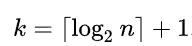

2. Scott’s Rule
> 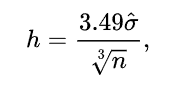   
> Choose bin sizes based on the standard deviation(σ) of the data.   
> It's optimal for random samples of normally distributed data, in the sense that it minimizes the integrated mean squared error of the density estimate.
3. Rice’s Rule
> 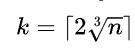    
> A simple alternative to Sturges' rule.
4. Freedman and Diaconis’s (1981) rule.
> 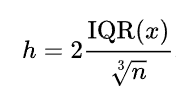   
> This formula uses the Interquartile Range.
> Not only considers the sample size but also considers the spread of the sample.

### Hypothesis testing

Core steps:
1. Choose bin size criterion by `plt.hist(bins='criterion')`
2. Check P-value and Pearson correlation `np.corrcoef()`
3. Accept/deny hypothesis

**H1: There is not a significant difference between in the average number of steps taken by men and women**

We can use [KS test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) to test if our data obeys normal distribution. This helps us to choose the best criterion.


In [ ]:
from scipy import stats
u = df_women_step_bmi['steps'].mean()  # calculate mean
std = df_women_step_bmi['steps'].std()  # calculate standard deviation
stats.kstest(df_women_step_bmi['steps'], 'norm', (u, std))

KstestResult(statistic=0.05871661155075614, pvalue=0.0027393219615030107)

**Reason to choose 'fd criterion'** :  

According to KS test result, p-value < 0.05. Our step data is **against normal distribution**. Thus, it's not suitable to choose Sturges' formula or Scott’s Rule. So we can apply a practical Freedman and Diaconis’s (1981) rule which uses the Interquartile Range, not only considers the sample size but also considers the spread of the sample.

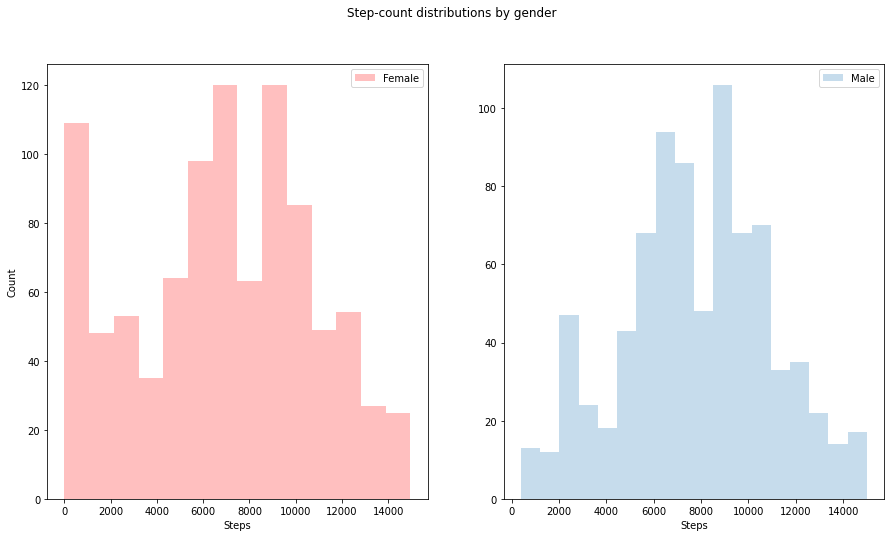

The data for the women shows the following means: Mean steps of 6857.76 and mean bmi of 25.14.
The data for the men shows the following means: Mean steps of 7792.55 and mean bmi of 25.10.


In [ ]:
# use 'fd' criterion to choose the number of bins
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.hist(df_women_step_bmi.steps,bins="fd", label="Female", color='red', alpha=0.25)
plt.ylabel('Count')
plt.xlabel('Steps')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_men_step_bmi.steps,bins="fd",label='Male',alpha=0.25)
plt.xlabel('Steps')
plt.legend()

plt.suptitle('Step-count distributions by gender')
plt.show()

m_steps_w = round(df_women_step_bmi.steps.mean(), 2)
m_bmi_w = round(df_women_step_bmi.bmi.mean(), 2)
m_steps_m = round(df_men_step_bmi.steps.mean(), 2)
m_bmi_m = round(df_men_step_bmi.bmi.mean(), 2)
print("The data for the women shows the following means: Mean steps of %.2f and mean bmi of %.2f." % (m_steps_w, m_bmi_w))
print("The data for the men shows the following means: Mean steps of %.2f and mean bmi of %.2f." % (m_steps_m, m_bmi_m))
print(f'Difference in the mean of steps for men and women: {np.abs(m_steps_m-m_steps_w)}')

In [ ]:
stats.ttest_ind(df_women_step_bmi.steps,df_men_step_bmi.steps)

Ttest_indResult(statistic=-5.539053975609961, pvalue=3.498915026461386e-08)

**Anwser**: We reject our H1 hypothesis. There is a statistically significant difference in the average number of steps taken by men and women!

**Explanation**:
> - Firstly, We set a significant level of 0.05, which is the threshold probability of incorrectly rejecting the null hypothesis when it is in fact true. 
> - Then, We use [T-test](https://www.wallstreetmojo.com/t-test/) to compare the mean differences between our gender groups. 
> - According to the T-test result above, we found that p-value is much smaller than 0.05, which means the probability of differences to have happened by chance in our comparing groups is below our significant level.
> -  We have a large t-value, which implies that there is a large difference in our datasets, and with a small p-value, we have that this difference is statistically significant. (t = -5 and t = 5 are identical in interpretation apart from the direction of the observed effect we are to investigate.)
> - This indicates that our null hypothesis has very low chance to occur. Hence we have reason to reject the null hypothesis that there isn't a statistically significant difference between step counts between men and women.

**H2: there is a negative correlation between the number of steps and the BMI for women**    
We will use Pearson's correlation here. Is there a negative correlation? How big is it?    
https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/

In [ ]:
stats.pearsonr(df_women_step_bmi.steps, df_women_step_bmi.bmi)

array([[ 1.        , -0.35585146],
       [-0.35585146,  1.        ]])

> The Pearson's correlation coefficient is around -0.36. The number of steps and the BMI for women have weak negative correlation. And with a p-value below 0.05, we can say this with statistical significance

**H3: there is a positive correlation between the number of steps and the BMI for men**    
Is there a positive correlation? Compare it with the one you found for women.

In [ ]:
stats.pearsonr(df_men_step_bmi.steps, df_men_step_bmi.bmi)

array([[ 1.       , -0.1600705],
       [-0.1600705,  1.       ]])

> No. There is a weak negative correlation of -0.16 between the number of steps and the BMI for men. And with a p-value below 0.05, we can say this with statistical significance

**Explanations**
1. Based on our first analysis, men and women have similar BMI average at about 25.103 and 25.144 kg/m2 respectively. In America, the NHANES I study4 in 1971-74, and [the NHANES III study5 in 1988-94](https://www.bing.com/search?q=1971-74%2C%20and%20the%20NHANES%20III%20%20gap%20between%20men%20and%20women%20&qs=n&form=QBRE&=%25eManage%20Your%20Search%20History%25E&msbsrank=0_0__0&sp=-1&pq=1971-74%2C%20and%20the%20nhanes%20iii%20&sc=0-28&sk=&cvid=FF4DC680A596440A8516E78A11150936), show that the gap between men and women has narrowed from 1.85 to 1.45 kg/m2 recently, which aligned with the result of our analysis. Besides, [ the CDC and World Health Organization (WHO) have set 25 kg/m2 as the overweight threshold ](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight) for men and women, young and old.
2. Secondly, regarding the correlation between the step count and BMI for both gender is negative, it means the more steps one walks, the lower BMI they are. [Research](https://vptfitness.net/2021/03/20/the-health-benefits-of-walking-and-higher-step-counts/) shows that higher number of steps per day helps people keep healthy and away from obesity. Plus, the average number of daily steps of male is higher than female, indicating that on average men should have lower BMI, which is exactly our first analysis told about.

### Scatter plots

Create a scatter plot with both data samples by using your own alternative to color='#f6756d' and color='#10bdc3'

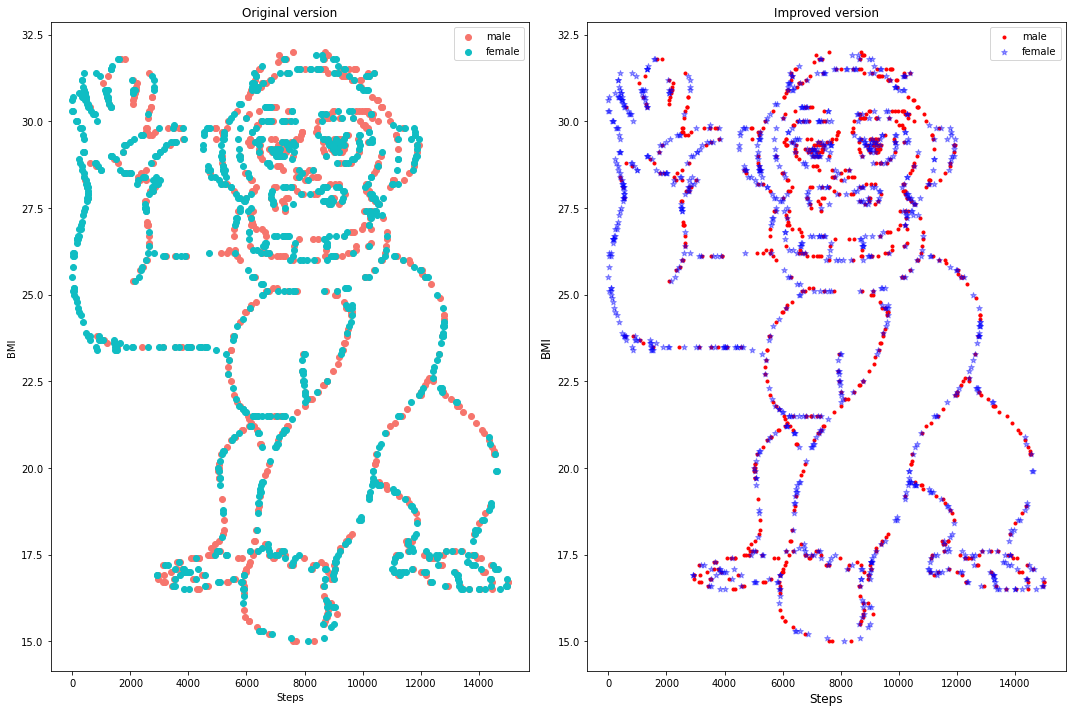

In [ ]:
fig=plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.scatter(df_men_step_bmi.steps,df_men_step_bmi.bmi, color='#f6756d',label='male')
plt.scatter(df_women_step_bmi.steps,df_women_step_bmi.bmi, color='#10bdc3',label='female')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('BMI')
plt.title('Original version')

plt.subplot(122)
plt.scatter(df_men_step_bmi.steps,df_men_step_bmi.bmi, color='#FF0000',marker = '.',label='male')
plt.scatter(df_women_step_bmi.steps,df_women_step_bmi.bmi, color='#0000FF',marker = '*',label='female',alpha=0.4)
plt.legend()
plt.xlabel('Steps', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.title('Improved version', fontsize=12)
plt.tight_layout()
plt.show()

### Actual shape of the data 

When visualizing the data, you notice right away that it looks like a gorilla as can be seen in the two plots above. However, with the hypotheses in mind and testing these, we might not have discovered this pattern in the data. Yanai and Lercher (2020) state that a "hypothesis can be a liability" because only the hypothesis is investigated and tested but other interesting insights in the data might be overlooked. The point of this exercise was to show us the importance of looking at and investigating data from different perspectives and not only with ideas that we already have in mind to get the most value and most interesting insights out of the data. 

**Explain why you chose this visualization, its pros, and cons.**

Why I choosed this: 
> For the original version, the color works fine but by checking on [ColorBlindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/), we found that these colors are not distinct enough for R/G/B-week group and the plot is not readable for monochromacy people. To be specific, the red color scheme in the eyes of red-green blind people is not a bright and eye-catching color. Choosing effective and friendly colour schemes for people, we need to ensure the color contrast distinct for various types of color-blindness. To consider monochromatic group, we need to ensure that the plot is interpreable without the need to identifying colors, that is to say, differentiation by different markers, annotations etc.

Pros    
> I chose colors based on [ColorADD](https://en.wikipedia.org/wiki/ColorADD),  which is a sign code for aiding color blind people to recognise colors. I used a strong contrast pattern of #FF0000 and #0000FF so nomatter what type of colourblind people can tell the difference. I also changed the shape or marker so it's friendly for monochromatic group to differentiate as well. The female group has more data, thus I adjusted the transparency of its color so the it would not cover the male points behind. As a result, the plot looks more user friendly.

Cons
>  To consider people with visual impairment, our color selection is limited. Another con is that though we've adjusted transparency of colors, but with many dense data points overlapped, it's not easy to tell exactly how many data points are of similar values on the plot.

<a id='part3'></a>
## Part 3: Different types of visualization from DAOST

The exercise below, is a selection of questions from Week 3, Part 2 and 3.

> *Exercise:*
>
> * *Questions from DAOST*
>     * Janert, the author of DAOST, is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 
>     * Explain what is a box plot. When are box plots most useful? Are violin plots better or worse than box plots? Why?
> * *Recreating plots from DAOST*. We need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined in Part 1.
>     * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>     * Create a box and whiskers plot showing the mean, median, quantiles, etc. for all 15 crime-types side-by-side. What does this plot reveal that you can't see in the plots from previous weeks?
>     * Now, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it: 
>        * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>        * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. (Refer to Week 3 exercise 3.2 for hints.)      
>        * Now, you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Comment your results. 

### Questions from DAOST
### Discussion about summary statistics 
*Janert, the author of DAOST, is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better.*

It is important to be careful when using summary statistics such as mean or median because they work with the two assumptions that data is symmetric and that there are not a lot of heavy outliers (Janert, 2010, p.34). However, real life data is messy. That is one of the main messages when working with data. This article from [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=646503506f63) shows that data cleaning is the most time consuming task for Data Scientists (Press, 2016) which supports that data might not always follow these two assuptions.

Additionally, the example of the [Anscombe-Quartett](https://de.wikipedia.org/wiki/Anscombe-Quartett) (Wikipedia, 2021a), four datasets with the same statistical summaries but different visualizations underlines that only relying on these summaries might lead to wrong assumptions. In the example of the Anscombe-Quartett it would be the asumption that the datasets are the same even though when visualizing them one realizes immediately that outliers and different distributions of data might still lead to the same stastical summaries.
![image.png](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/anscombe.png) (Lehmann, 2022)

Finally, there are cases where summary statistics can be very imprecise for example when taking a small sample. The smaller the sample the more do these summary statistics vary and the less they represent the overall population they have been sampled from. So, there needs to be enough data to caclulate meaningful statistics (Weissgerber et al., 2019) and visualization can help to show the actual size and values from a sample (for example a scatter plot).

These are examples why visualizing the full data is always important to get an overview of the actual values, possible outliers and distributions. There might be limitations to the interpretability of the full data (for example if a plot is just full of points or points are hidden in a plot) so data needs to be explored and visualized from different perspectives. 

### Theory on box and violin plots
*Explain what a box plot is.*

In short, a boxplot is a visualization of the distribution of a dataset in one graph. It consists of 
* a marker for the median
* a box indicating the interquantile range 
* whiskers up and down to the upper and lower adjacent 
* symbols for outliers
and gives on overview of the structure of a dataset (Janert,  2010, p.36f.).

As indicated in the first question Janert (2010, p.23) is suspicious of summary statistics, but Massert et al. (2005, p.2) support that boxplots are based on robust statistics as they are based on median or quantiles which are more resistant to outliers than for example the mean or the standard deviation. The first paragraph already explained that this is important due to real life and in practice data often contain outliers and do not follow symmetric distributions.

*When are box plots most useful?*

Box plots are most useful when comparing several distributions (Janert, 2010, p.27) for example distribution of features for different categories in a dataset or the overall structure of different dataset. Galarnyk (2018) supports this adding that this is due to the space efficency of the boxplot, it takes up little space conveing a lot of information. Also, the boxplot provides a clear visual of the typcial range of data and the outliers outside of this range (Janert, 2010, p.27) which can support investigating outliers and their reasons. 

*Are violin plots better or worse than box plots? Why?*

"When you've got a good visualization, people get it right away and you get a conversation going." (Ofer Mendelevitch cited Mike Barlow, 2014) This quote underlines the importance of making visualization easy to understand and is one key perspective when discussing violin and box plots.

Violin plots are an extended version of the box plot with a kernel density plot in addition to the information from the box plot (Wikipedia, 2022d) and they can be very useful for data that is distributed differently with the same data range and median as shown in the first graph [here](https://blog.bioturing.com/2018/05/16/5-reasons-you-should-use-a-violin-graph/). So, they contain more information about the data than the box plot.

However, Violin plots are used less frequently and widely so people are not as used to violin plots and their interpretation (Wikipedia, 2022d). When looking at a violin and a box plot next to each other for example in the picture below the information for the violin plot might also not be as easy and fast to understand as for example outliers are not explicitly marked as in the boxplot. 
![image.png](https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png)
(Lewinson, 2019)

Even though violin plots convey more information they might be less suitable as a visualization should give a clear picture of data and speak for itself. That might be easier to achieve with boxplots. However, an important part of communicating the insights or storytelling with a visualization is also the audience ("Who is your audience?"(Anderson, 2015). When the visualization is aimed at a highly educated and trained audience in the field of statistics working with a violin plot might be an advantage, when aiming at a general or large audience outside of this special field, box plots might be better suited.

To conclude, for a communicating to a large audience with broad knowledge and fields of work or education, the boxplot is the more suiteable choice for a clear and easy to understand presentation of distributions and comparisons of data.

### Recreating plots from DAOST

*We need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined in Part 1.*

### Number of crimes per day

*For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data.*
    
Core steps:
1. Reduce the data to the focuscrimes
2. Group the data by Category and Date to get the number of crimes per day within each category
3. Create an ascending order by median of the category as preparation for the boxplot

In [ ]:
# filter data to focuscrimes
df_focuscrimes = df_crime[df_crime.Category.isin(focuscrimes)]
# caluclate the number of crimes per day by grouping the data by category and day
focus_crimes_day = df_focuscrimes.groupby(['Category', 'Date']).agg(no_focus_crimes_day = pd.NamedAgg(
                                column='IncidntNum', aggfunc=pd.Series.nunique)).reset_index() 
# create an order by median as preparation for the boxplot
order_by_med = focus_crimes_day.groupby('Category')['no_focus_crimes_day'].median().sort_values(ascending=False).index

### Boxplots for focuscrimes per day

*Create a box and whiskers plot showing the mean, median, quantiles, etc. for all 15 crime-types side-by-side. What does this plot reveal that you can't see in the plots from previous weeks?*
    
Core steps:
1. Set figure, figure size and theme
2. Create boxplot and customize colors 
3. Format plot with title and labels

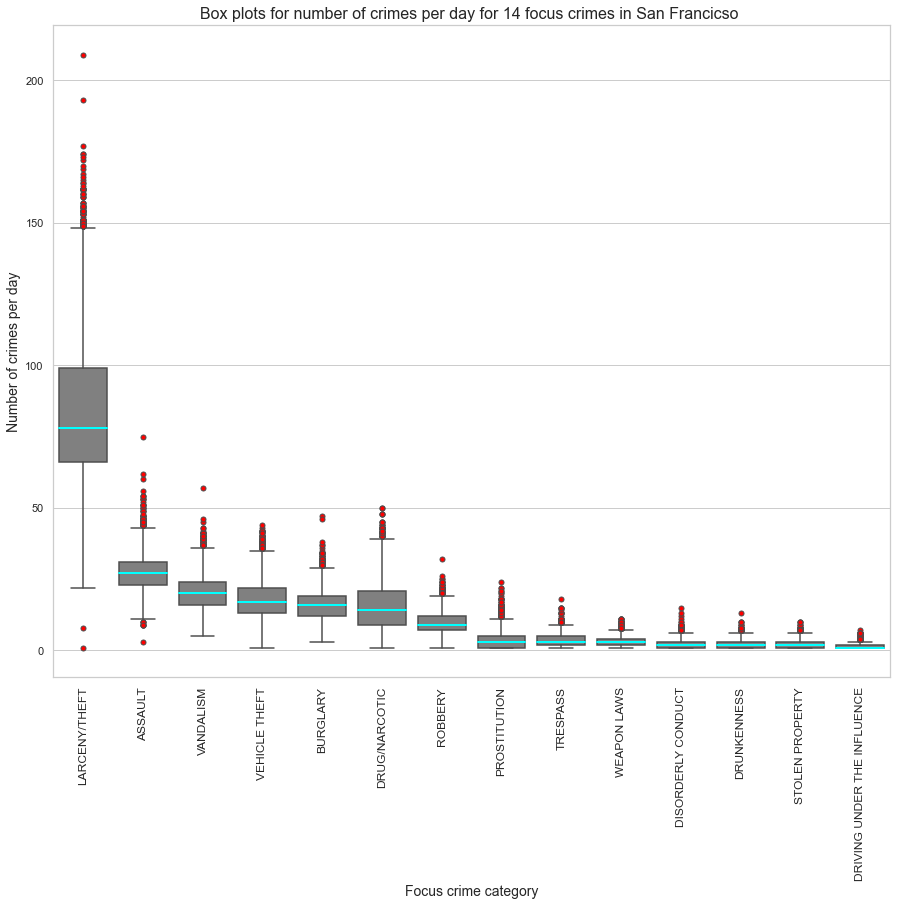

In [ ]:
# create box plots for number of crimes per day
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x='Category', y='no_focus_crimes_day', data=focus_crimes_day, order=order_by_med, color='gray',
                      medianprops=dict(color="#00FFFF", linewidth=2), 
                      flierprops=dict(markerfacecolor="#FF0000" , marker="o"))

boxplot.axes.set_title("Box plots for number of crimes per day for 14 focus crimes in San Francicso ", fontsize=16)
boxplot.set_xlabel('Focus crime category', fontsize=14)
boxplot.set_xticklabels(boxplot.get_xticklabels(), fontsize=12, rotation=90)
boxplot.set_ylabel("Number of crimes per day", fontsize=14)
plt.show()

### Findings

*2.2 What does the boxplox reveal that you can't see in the plots from previous weeks?*

The boxplot above reveals the typical range of number of crimes (in this example for crimes per day) and outliers from this range that can't be seen in the plots from previous weeks. This visualization emphasizes that outliers are present in each category and raises need for further investigation. For example: Is there a reason behind the two days that have about 100 - 150 more crimes in the category Larceny/Theft than in average (compared to the median) or are the outliers influenced by humans (possibly there was a police training the week before specialized on this category as it is the one with the most crimes and there were intense training days to put the knowledge to action (the explanation for outliers would need to be investigated furthis this is just an example)). 

In the previous weeks it was evident that there were different levels of crime numbers between the categories (for example [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png) (Lehmann, 2022), however there was no overview of numbers of crime within the category and their characteristics/typical values.

### Boxplots for focuscrimes at time of day
*Now, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it:*
* *For datapoint, the only thing you care about is the time-of-day, so discard everything else.*
* *You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. (Refer to Week 3 exercise 3.2 for hints.)*    
* *Now, you can create box-plots to create an overview of when various crimes occur.*

Core steps:
1. Reduce the data to category and time data
2. Convert the time to minutes since midnight, with the hints from week 3 minutes from midnight were chosen as they are easier to interpret than seconds
3. create boxplots as in the exercise above

In [ ]:
# creating a plot for the average time-of-day that a crime takes place for the focus crimes
# only keep the time data for each category
df_focuscrimes_time = df_focuscrimes.loc[:,['Category', 'Hour', 'Minute']]

# create a minute column for the minute of the day (since midnight)
df_focuscrimes_time.loc[:,'Min_day'] = df_focuscrimes_time.loc[:,'Hour']*60 + df_focuscrimes_time.loc[:,'Minute']

# create an order by median as preparation for the boxplot
order_by_med = df_focuscrimes_time.groupby('Category')['Min_day'].median().sort_values(ascending=False).index

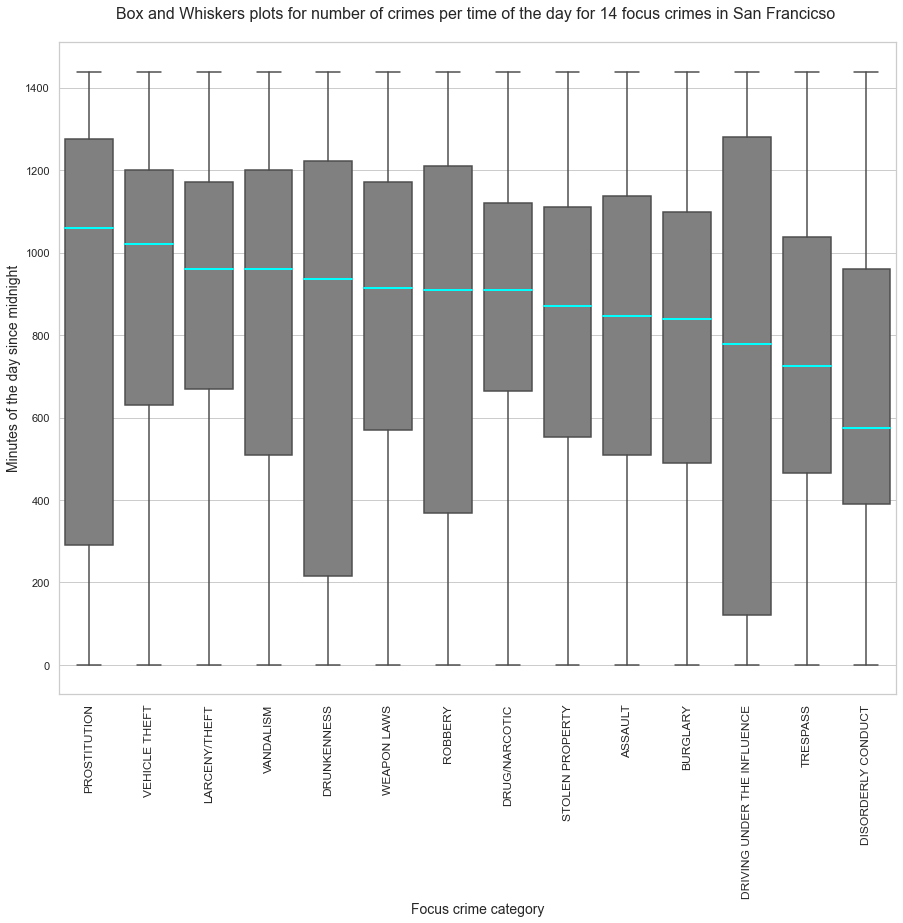

In [ ]:
# create box plots for overview when crimes occur
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x='Category', y='Min_day', data=df_focuscrimes_time, color='gray', order=order_by_med,
                      medianprops=dict(color="#00FFFF", linewidth=2))
boxplot.axes.set_title("Box and Whiskers plots for number of crimes per time of the day for 14 focus crimes in San Francicso \n", fontsize=16)
boxplot.set_xlabel('Focus crime category', fontsize=14)
boxplot.set_xticklabels(boxplot.get_xticklabels(), fontsize=12, rotation=90)
boxplot.set_ylabel("Minutes of the day since midnight", fontsize=14)
plt.show()

### Findings

*Note that these plot have quite a different interpretation than ones we created in the previous exercise. Comment your results.*

In contrast to the box plots of number of crimes per day in 2.2, these boxplots do not give any insights into outliers in the data as there are no outliers. This is because crime can only happen in the 24 hours (1440 minutes) of the day and not outside of that timeframe. Also the whiskers cannot be interpreted in these boxplots as 100% of the data falls in the range of the time of the day.

These boxplots show the typical time range for each category and it can be observed that some crime categories are wider spread over the day such as Driving under the influence as the interquantile range is larger compared to the other categories while other crime categories such as Drug/Narcotic have a smaller interquantile range and so the data the minutes of the day is spread less around the median. So the range of the data can be interpreted for each category as well as compared to other categories. This boxplot is more useful and focuses on comparing the distributions and median of the categories.

<a id='part4'></a>
## Part 4: Visualizing geo-data

Let's now use the cool Folium functionalites `HeatMap` and `HeatMapWithTime` to create a visualization of the patterns of your favorite crime-type and how they change over time. 

**Note** The exercise below is a mix of exercise 1.2 (**but with the data you choose**) and 1.3 from Week 4.

> *Exercise*: Heatmaps and heatmap movies. you get to make all the choices, but remember to **explain and motivate them**.
> * Start by choosing a crimetype with spatial patterns that change over time. Use your data-exploration from the previous lectures to choose a good one.
> * Create a heatmap by grabbing your crimetype data across all times. Play with parameters to get plots you like and explain why you chose them and what the effect of these parameters are.
> * Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though. Create the movie using `HeatMapWithTime`.
> * Comment on your results: 
>   - What patterns does your movie reveal?
>   - Motivate/explain the reasoning behind your choice of crimetype and time-resolution (you can also refer to exercises/visualizations that we have done in class to motivate your choice). 

### Crime of interest

Let's try to find a crime type that's interesting to look at (spatial patterns)

To make is easier for ourselves (with respect to the next exercise), we will now take a look at the data and find a crime, within the *focus crimes* that has spatial patterns that change over time, and a measure that has more than 20 frames. Thus, we will consider the
* hourly pattern (24 hours) and the
* [weekly pattern (168 hours)](#168-hour-pattern) (click on the link)

The 24-hour plot is plotted below


Core steps:
1. Disregard 2018 data
2. Group the data by Category and Hour and count crime occurences on those hours
3. Plot bar chart (for every category)
4. Choose interesting crime type (here, DRUNKENNESS)
5. Display heatmap
6. Display heatmap (with time)

#### Hourly pattern

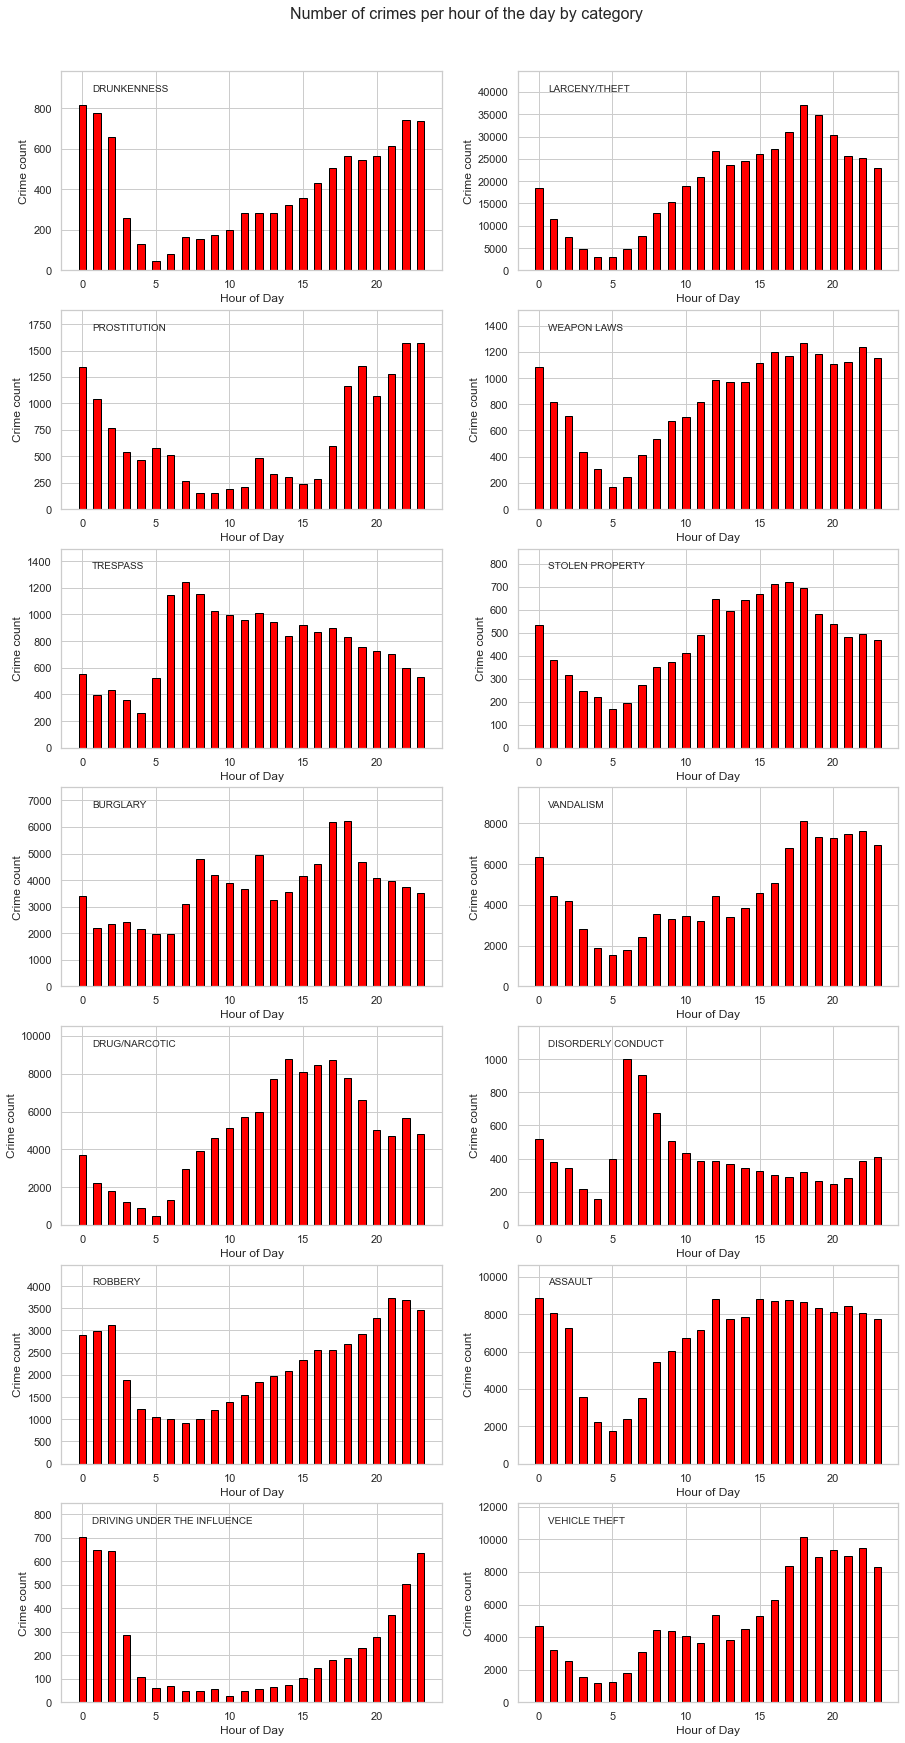

In [ ]:
df_hourly = pd.DataFrame({'count': df_crime[df_crime['Year']!=2018].groupby(['Category', 'Hour']).IncidntNum.count()})
df_hourly = df_hourly.reset_index('Category')

plt.figure(figsize=(15,30))

for i in range(len(focuscrimes)):
    plot_index = i+1
    plt.subplot(7, 2, plot_index)
    crime = df_hourly[df_hourly['Category']==focuscrimes[i]] # subplot posistion
    crime_categories = df_hourly.index.unique() # x aixs values
    crime_counts = crime['count'].values # y axis values
    
    plt.bar(crime_categories,crime_counts,color='#FF0000',edgecolor='black',width=0.5)
    # lengthen y axis so to leave some space for annotation 
    plt.ylim(0,crime_counts.max()*1.2)

    # add annotation text
    x0, xmax = plt.xlim()
    y0, ymax = plt.ylim()
    # set a fixed text posistion according x,y-axis limit
    data_width = xmax - x0
    data_height = ymax - y0
    plt.text(x0 + data_width * 0.08, y0 + data_height * 0.9, focuscrimes[i], horizontalalignment='left', fontsize=10)
    # add ylabel
    plt.ylabel(ylabel='Crime count',fontsize=12)
    plt.xlabel('Hour of Day',fontsize=12)

plt.suptitle('Number of crimes per hour of the day by category', size=16, y=0.91)
plt.show()

#### Weekly pattern (168 hours)

The parttern for hours of the week was already created and explained in part 1.
- [168 hours of the week-plot](#168-hour-pattern)

#### Findings 

From the 24-hour plot and the [weekly 168 hour plot](#168-hour-pattern), we see that *Drunkeness* and *Driving under the influence* has a fun pattern that we can follow. The number of crimes increases both during the day and during the week. It is also somewhat relatable, so let us look into Drunkeness & Driving under the influence

In [ ]:
our_focuscrime1 = 'DRIVING UNDER THE INFLUENCE'
our_focuscrime2 = 'DRUNKENNESS'

In [ ]:
# Most focus crimes for DRIVING UNDER THE INFLUENCE
df_temp = pd.DataFrame(df_focuscrimes[df_focuscrimes.Category == our_focuscrime1].groupby('PdDistrict')['IncidntNum'].count().sort_values(ascending=False))
df_temp.IncidntNum.apply(lambda x : "{:,}".format(x))

PdDistrict
MISSION       908
RICHMOND      799
SOUTHERN      760
NORTHERN      596
TARAVAL       548
INGLESIDE     519
BAYVIEW       455
PARK          419
CENTRAL       404
TENDERLOIN    244
Name: IncidntNum, dtype: object

In [ ]:
# Most focus crimes for DRUNKENNESS
df_temp = pd.DataFrame(df_focuscrimes[df_focuscrimes.Category == our_focuscrime2].groupby('PdDistrict')['IncidntNum'].count().sort_values(ascending=False))
df_temp.IncidntNum.apply(lambda x : "{:,}".format(x))

PdDistrict
SOUTHERN      2,142
MISSION       1,797
CENTRAL       1,194
TENDERLOIN      984
NORTHERN        814
PARK            784
TARAVAL         661
BAYVIEW         569
INGLESIDE       458
RICHMOND        357
Name: IncidntNum, dtype: object

We see that the number of citations / arrests for *DRIVING UNDER THE INFLUENCE* is evenly spread out for all the districts (ish), so let us us have a closer look at just *DRUNKENNESS* across all times (including just the first half of 2018 might have an impact on the distribution of the data but the exercise asks to use data across all times).

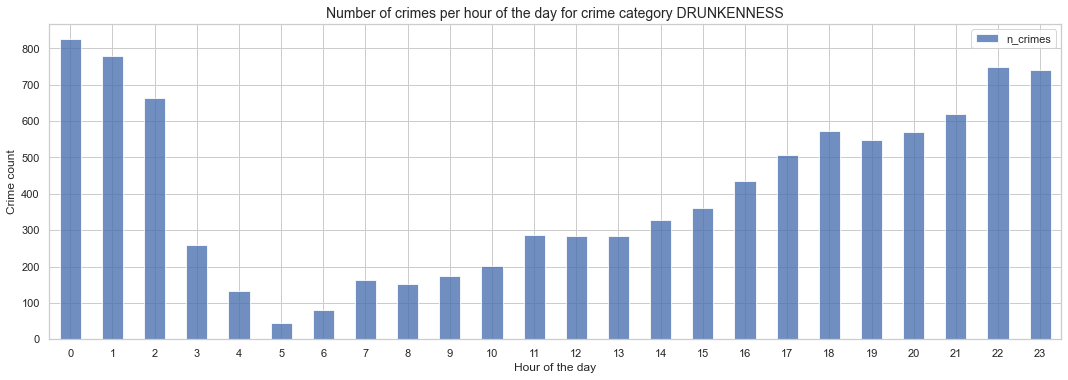

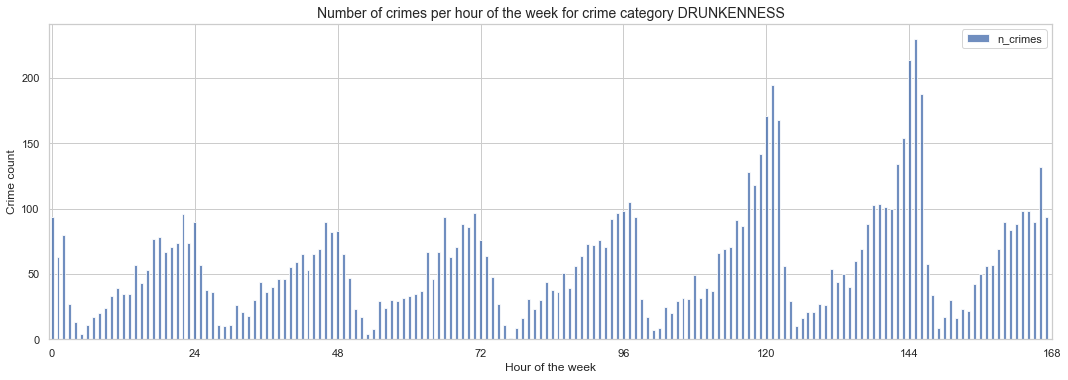

In [ ]:
# Narrow down to our crime of interest
df_drunk = pd.DataFrame(
    df_focuscrimes[(df_focuscrimes.Category == our_focuscrime2)]
)

df_temp = df_drunk
# Aggregate
df_temp = pd.DataFrame(df_temp.groupby(['Category', 'Hour'])['IncidntNum'].count()).reset_index(drop=False)
df_temp.columns = ['Category', 'Hour', 'n_crimes']

# Plot by the hour
fig = plt.figure()
focuscrimes1 = list(df_temp.Category.unique().tolist())
for category in range(len(focuscrimes1)):
    ax = fig.add_subplot(2, 1, category + 1)
    
    df_temp[df_temp.Category == focuscrimes1[category]].plot(
        kind='bar',
        x='Hour',
        y='n_crimes',
        alpha=0.8,
        ax=ax,
        figsize=(15,10)
    ) 
    
    ax.set_title('Number of crimes per hour of the day for crime category DRUNKENNESS', fontsize=14)
    ax.set_xlabel('Hour of the day', fontsize=12)
    ax.set_ylabel('Crime count', fontsize=12)
    ax.set_xticklabels(np.arange(0, 24), rotation=0)

plt.tight_layout()

# Same as above, now plot by the hour of the week
df_temp = df_drunk
df_temp = pd.DataFrame(df_temp.groupby(['Category', 'HourOfWeek'])['IncidntNum'].count()).reset_index(drop=False)
df_temp.columns = ['Category', 'HourOfWeek', 'n_crimes']

fig = plt.figure()
focuscrimes1 = list(df_drunk.Category.unique().tolist())
for category in range(len(focuscrimes1)):
    ax = fig.add_subplot(2, 1, category + 1)
    
    df_temp[df_temp.Category == focuscrimes1[category]].plot(
        kind='bar',
        x='HourOfWeek',
        y='n_crimes',
        alpha=0.8,
        ax=ax,
        figsize=(15,10)
    )
    
    ax.set_title('Number of crimes per hour of the week for crime category DRUNKENNESS', fontsize=14)
    ax.set_xlabel('Hour of the week', fontsize=12)
    ax.set_ylabel('Crime count', fontsize=12)
    ax.set_xticks(np.arange(0, 169, 24))    
    ax.set_xticklabels(np.arange(0, 169, 24), rotation=0)

plt.tight_layout()

#### Findings
The distribution of crimes is pretty much what we would expect, but let's investigate it further visually and geographically with Heatmaps to get into more detail.

### HeatMap

Create a heatmap by grabbing your crimetype data across all times. Play with parameters to get plots you like and explain why you chose them and what the effect of these parameters are.

In [ ]:
# Set latitude and longitude of San Fransisco from LatLong.net
sf_lat = 37.773972
sf_long = -122.431297

# Initialize map of San Fransisco
map_sf = folium.Map(location=[sf_lat, sf_long],
                    tiles="Stamen Toner",
                    zoom_start = 13) # Uses lat then lon. The bigger the zoom number, the closer in you get

# Our crime type of interest
df_temp = df_drunk[df_drunk.Category == 'DRUNKENNESS']
df_temp['longitude'] = df_temp.X
df_temp['latitude'] = df_temp.Y


heat_df = df_temp[['latitude', 'longitude']].copy()
heat_df = heat_df.dropna(axis=0, subset=['latitude', 'longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]


# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.25, 
        radius = 10,
        blur = 6,
       ).add_to(map_sf)

# Hall of justice latitude & longitude
hoj_lat = 37.7753
hoj_long = -122.4039

# Add marker to Hall of Justice
folium.Marker([hoj_lat, hoj_long], popup='Hall of Justice').add_to(map_sf)

# Display the map
map_sf

### Findings

Parameters:
- `row.latitude` & `row.longitude`: Self.explanatory
- `zoom_start = 13`, This defines the default map and how "zoomed-in" the map initially is. Initially, we would like to have a good view of the whole HeatMap from the get-go.
- `tiles`: The style of the map. Having `tiles="Stamen Toner"`, we have that the background is black and the distinction between the map and the dots (heat) become clearer
- `radius`: the radius of the circle / scatter. Smaller circles makes it clearer where the exact crime occurred
- `opacity`: Decreasing the opacity of the circle / heat allows for better interpretation of where the crime occurs and how many crimes happen at a place. Decreasing the opacity is the same as decreasing the sensitivity of the warmth vs number of crimes (then is takes more crimes to create a "hotter" area)
- `popup`: When clicked, the marker "pop-ups" a box with the name defined in this parameter
- `min_opacity`: When heat is "discovered", this parameter defined the minimum opacity of that heat. The lesser the opacity, the more crimes needed to create strong heat.

Plot:
- We see a whole bunch of crimes related to *DRUNKENNESS* in the hot-spots of San Fransisco. Specifically, these hot-spots are around the bars and night clubs of San Fransisco, which are located nearby Market Street (in a line) and Mission Street.
- What we also see is that a lot of arrest / citations happen at the Hall of Justice (850 Bryant St, San Francisco). This is due to the fact that people get cited *whilst being* at the Hall of Justice - thus, this place is the location of the arrest and, in fact, where the arrest is *booked*. You can think of this as a **drop-in-arrest / citation**

### HeatMap (With time - 24 hours)

* Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though. Create the movie using `HeatMapWithTime`.

In [ ]:
sf_lat = 37.773972
sf_long = -122.431297

map_sf = folium.Map(location=[sf_lat, sf_long],
                    tiles="Stamen Toner",
                    zoom_start = 13) # Uses lat then lon. The bigger the zoom number, the closer in you get

df_temp = df_drunk[df_drunk.Category == 'DRUNKENNESS']
df_temp['latitude'] = df_temp.Y
df_temp['longitude'] = df_temp.X

heat_df = df_temp[['latitude', 'longitude']].copy()
# Make the heatmap with weights according to Hour (unique hours)
heat_df['Weight'] = df_temp['Hour'].copy()
heat_df['Weight'] = heat_df['Weight'].astype(int)
heat_df = heat_df.dropna(axis=0, subset=['latitude', 'longitude', 'Weight'])

# Make the map iterable over the 24 distinct hours
heat_data = [[[row['latitude'], row['longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,24)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, auto_play=True, max_opacity=0.5)
hm.add_to(map_sf)


# Display the map
map_sf

### Findings

Again, we see a whole bunch of crimes related to *DRUNKENNESS* in the hot-spots of San Fransisco. Specifically, these hot-spots are around the bars and night clubs of San Fransisco. The timeline suggests that people in San Fransisco go out at night, so this makes sense that the busy streets (when night-time gets closer) are the ones whereon people get cited for drunkedness. 
- *(fun fact)* It is illegal to be drunk on the streets in USA (or even drink in public). You can read more about this law [here](https://leginfo.legislature.ca.gov/faces/billNavClient.xhtml?bill_id=201720180SB905)

The number of crimes including *DRUNKENNESS*  rises until 2am (note that this is timeframe 3 in the Heatmap, so the time until 3am), whereafter the number of crimes drop significantly. 
- *(fun fact)* You cannot buy alcohol in San Fransisco after 2am, so it's not surprising that we see a drop of drunkenness citations after this time. Read more about this law [here](https://leginfo.legislature.ca.gov/faces/billNavClient.xhtml?bill_id=201720180SB905)

To sum up, the heatmap points out the hotspot of San Franciscos night-time scence as being drunk on the streets is illegal in the US and lead to discovering laws in San Francisco that explain the diminishing of the heat from 3am on. 

<a id='part5'></a>
## Part 5: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the temporal activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/prostitution.png), where I've highlighted the phenomenon I'm talking about.
2. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png), where I've highlighted the phenomenon I'm talking about.
3. And, during Week 4 we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png).

> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below:
>
> * In each of the examples above, describe in your own words how the data-errors, I call attention to above, can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
> * Find your own example of human noise in the data and visualize it. Comment your results.

### 1. Prostitution: The outlier on Thursday at 12pm: Maybe it's when the prosecution takes place?

What we saw from the heatmap is that a lot of arrest / citations happen at the Hall of Justice (850 Bryant St, San Francisco). This is also true for `PROSTITUTION`. This is due to the fact that people get cited *whilst being* at the Hall of Justice - thus, this place is the location of the arrest and, in fact, where the arrest is *booked*. You can think of this as a **drop-in-arrest / citation**

If we assume the above, then can think of the folowing: Does the Hall of Justice have a day of the week where cases of `PROSTITUTION` are being handled? This could for instance be on Thursdays:

In [ ]:
df_crime[(df_crime.Category == 'PROSTITUTION') & (df_crime.Year != 2018)].groupby('DayOfWeek')['IncidntNum'].count()

DayOfWeek
Friday       2776
Monday       1123
Saturday     1571
Sunday       1059
Thursday     3630
Tuesday      3003
Wednesday    3291
Name: IncidntNum, dtype: int64

In [ ]:
sf_lat = 37.773972
sf_long = -122.431297

map_sf = folium.Map(location=[sf_lat, sf_long],
                    tiles="Stamen Toner",
                    zoom_start = 13) # Uses lat then lon. The bigger the zoom number, the closer in you get


df_temp = df_crime[(df_crime.Category == 'PROSTITUTION') & (df_crime.Year != 2018)]
df_temp['longitude'] = df_temp.X
df_temp['latitude'] = df_temp.Y


heat_df = df_temp[['latitude', 'longitude']].copy()
heat_df['Weight'] = df_temp['DayOfWeek_int'].copy()
heat_df['Weight'] = heat_df['Weight'].astype(int)
heat_df = heat_df.dropna(axis=0, subset=['latitude', 'longitude', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['latitude'], row['longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,7)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, auto_play=True, max_opacity=0.5)
hm.add_to(map_sf)


# Display the map
map_sf

### Findings

The above actually disproves our hypothesis of prostitutes being arrested in City Hall as this is a steady hotspot in the Heatmap. <br>
However, the plot also reveals that there is a general trend of being more arrests for prostitution on Thursdays than any other day. What we also see is that we have areas of general prostitution activity in San Fransisco. Maybe prostitution and Thursdays are just outliers with respect to the data - and not a human error?

### 2. timestamps are recorded

With respect to many more crimes being recorded on the hour. 15 minutes past the hour, and to a lesser in whole increments of 10 minutes, instead of a jitter-plot, we now present the number of crimes recorded per minute of the hour:

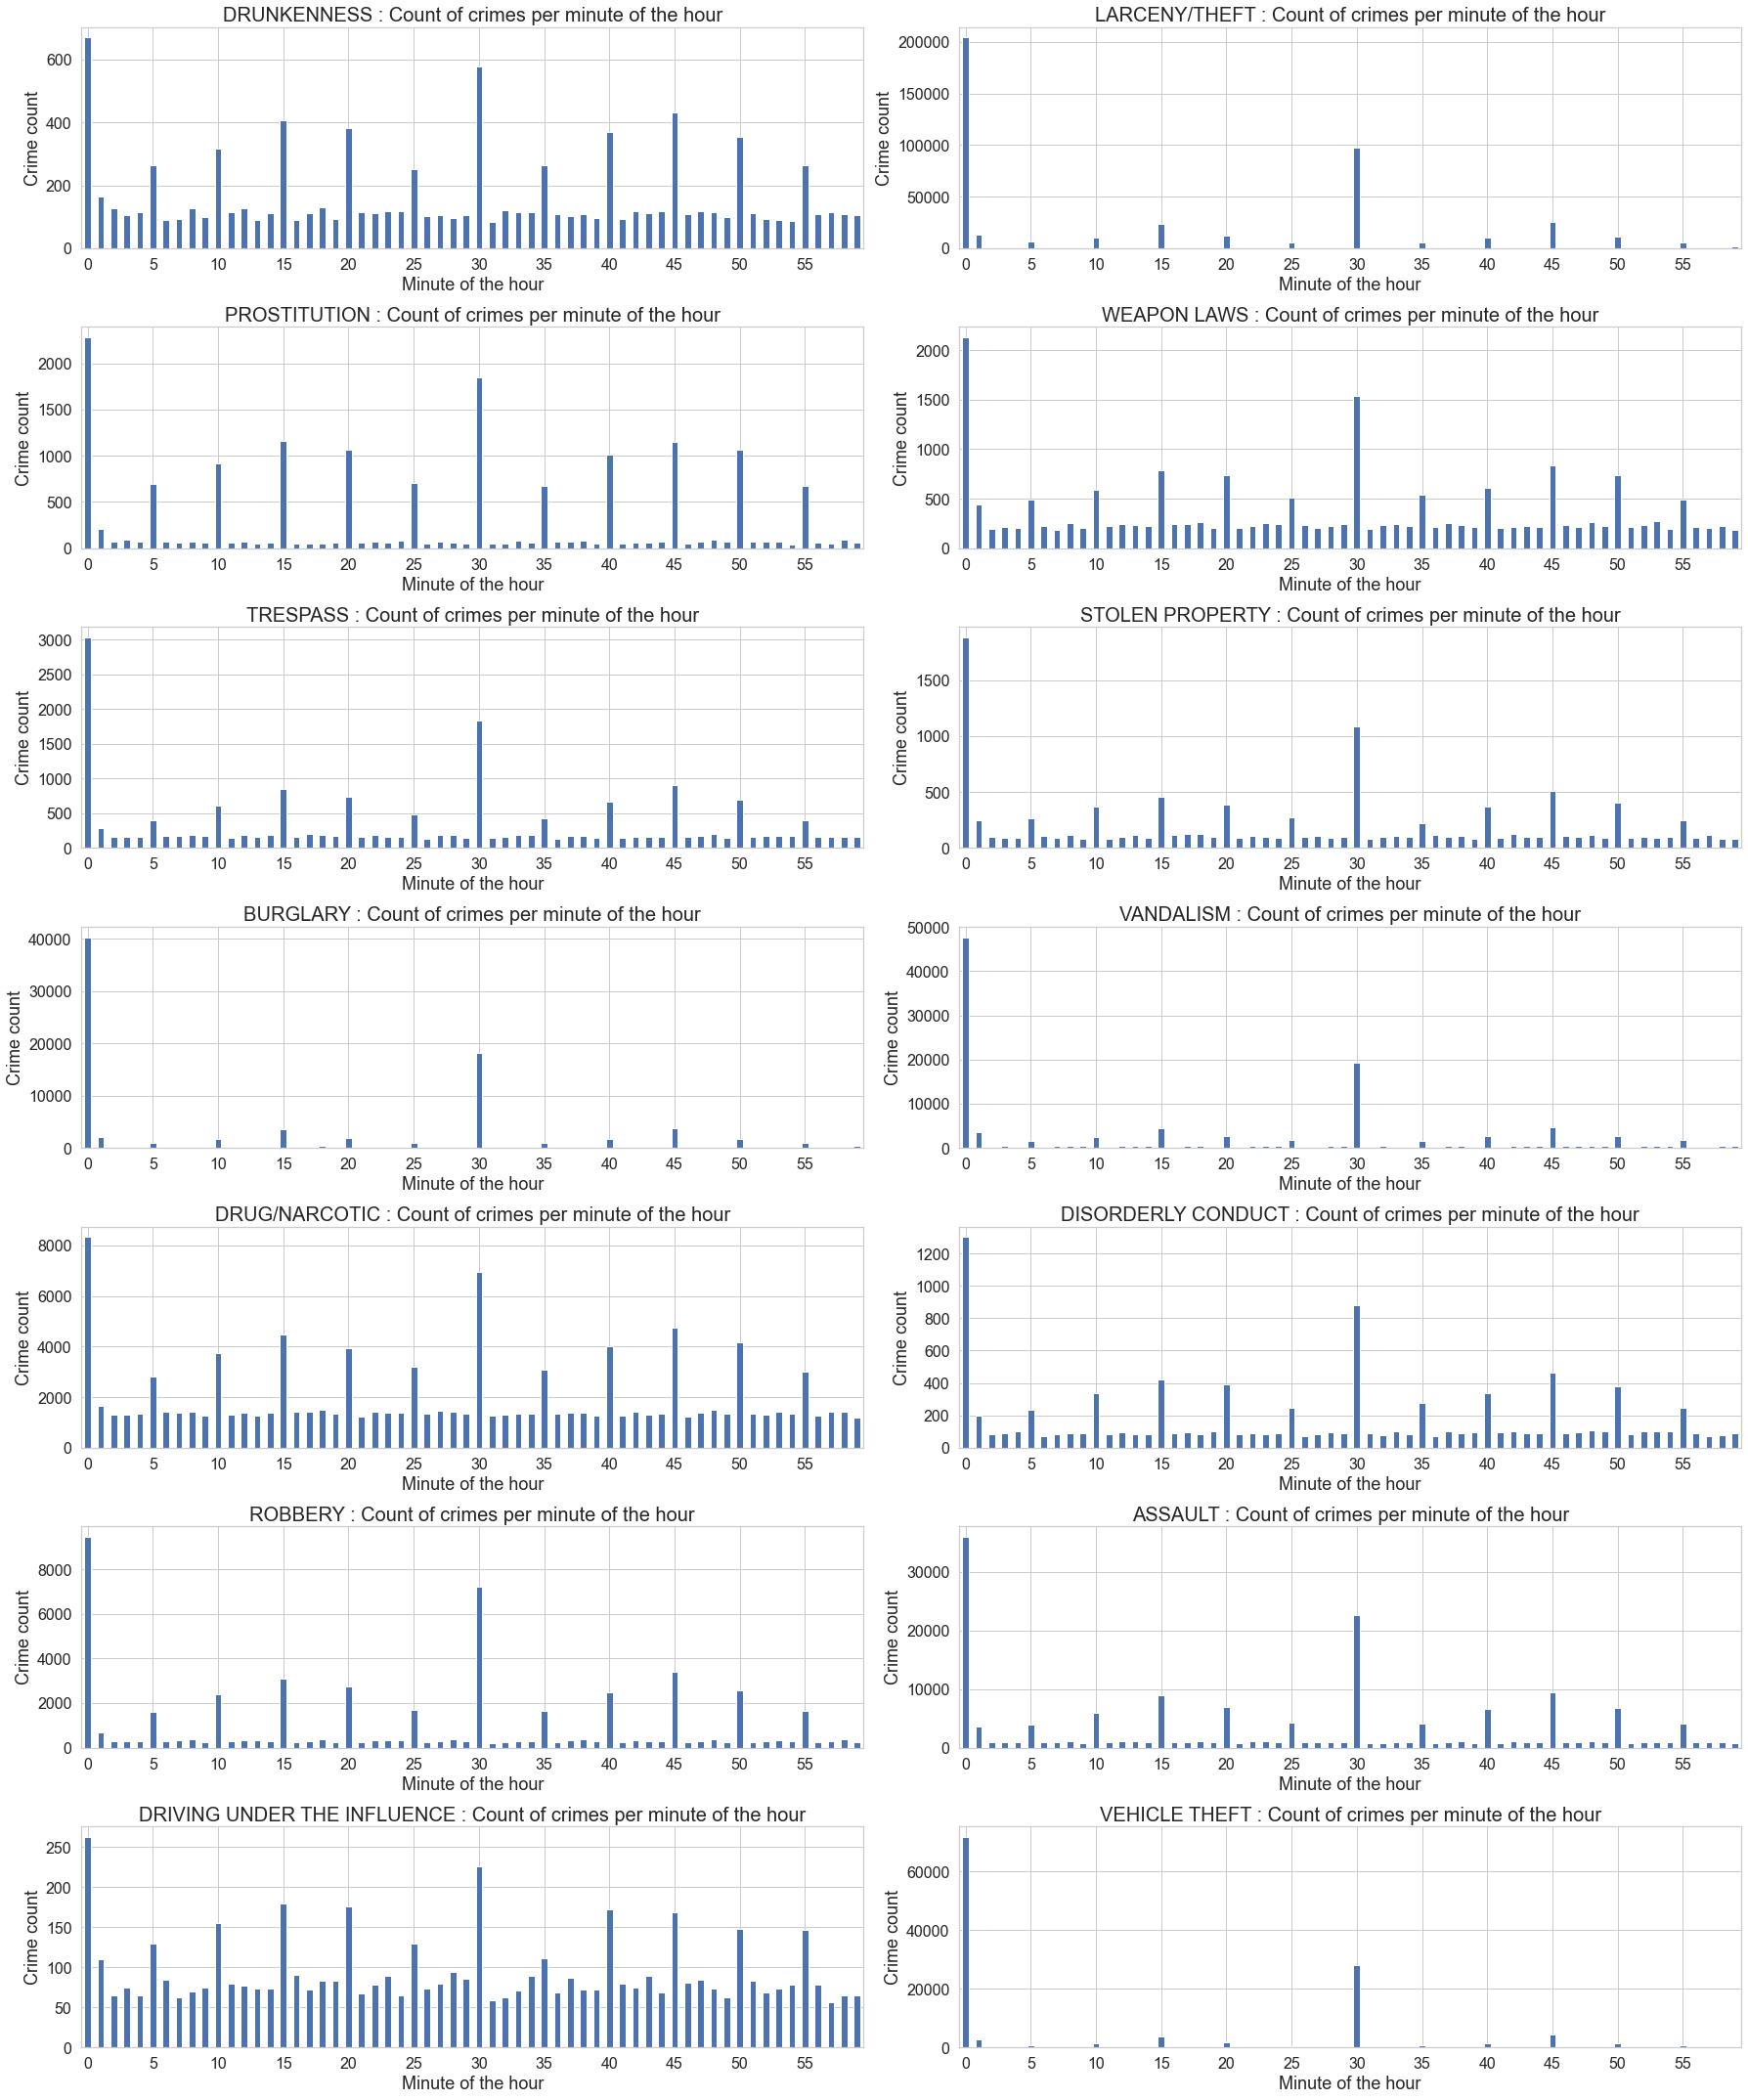

In [ ]:
fig = plt.figure()

for category in range(len(list(focuscrimes))):
    ax = fig.add_subplot(7, 2, category + 1)
    df_temp = df_focuscrimes[df_focuscrimes.Category == list(focuscrimes)[category]]
    df_temp = pd.DataFrame(df_temp.groupby(['DayOfWeek', 'Minute'])['IncidntNum'].count()).reset_index(drop=False)
    df_temp.columns = ['DayOfWeek', 'Minute', 'cnt']

    df_temp.groupby('Minute')['cnt'].sum()\
        .plot(
        kind='bar',
        xlabel='Minute',
        ylabel='Count of crimes',
        ax=ax,
        figsize=(25,30)
    )
    
    ax.set_title(f'{list(focuscrimes)[category]} : Count of crimes per minute of the hour', fontsize=20)
    ax.set_xlabel('Minute of the hour', fontsize=18)
    ax.set_ylabel('Crime count', fontsize=18)
    ax.set_xticks(np.arange(0, 60, 5))     
    ax.set_xticklabels(np.arange(0, 60, 5), rotation=0, fontsize=16)
    ax.tick_params(axis="y", labelsize=16)
    
plt.tight_layout()

### Findings

We see a majority crimes being recorded on the hour. This is true for all crime types / categories. <br>
This doesn't mean that the crimes didn't occur in between those round numbers, it basically just means that the majority of police officers don't care to write down the crime to the minute.

### 3. Hall of Justice seemed to be an unlikely hotspot
Let us look at the heatmap for sec offences as a quick reminder of the hotspots.

In [ ]:
sf_lat = 37.773972
sf_long = -122.431297

# Initialize map of San Fransisco
map_sf = folium.Map(location=[sf_lat, sf_long],
                    tiles="Stamen Toner",
                    zoom_start = 13) # Uses lat then lon. The bigger the zoom number, the closer in you get

# Our crime type of interest
df_temp = df_crime[(df_crime.Category == 'SEX OFFENSES, NON FORCIBLE')]
df_temp['longitude'] = df_temp.X
df_temp['latitude'] = df_temp.Y


heat_df = df_temp[['latitude', 'longitude']].copy()
heat_df = heat_df.dropna(axis=0, subset=['latitude', 'longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]


# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.6,
        radius = 12,
        blur = 8,
       ).add_to(map_sf)

# Hall of justice latitude & longitude
hoj_lat = 37.7753
hoj_long = -122.4039

# Add marker to Hall of Justice
folium.Marker([hoj_lat, hoj_long], popup='Hall of Justice').add_to(map_sf)

# Add title with help from Stack Overflow (2020)
loc = 'Heatmap of non forcible sex offenses'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
map_sf.get_root().html.add_child(folium.Element(title_html))
# Display the map
map_sf

### Findings

What we found in the heatmap was that a lot of arrest / citations happen at the Hall of Justice (850 Bryant St, San Francisco). This is due to the fact that people get cited *whilst being* at the Hall of Justice - thus, this place is the location of the arrest and, in fact, where the arrest is *booked*. You can think of this as a **drop-in-arrest / citation**

### Example of human noise in the data with visualization
*Find your own example of human noise in the data and visualize it. Comment your results.*

To find an example of human noise in the data, the following assumption is helpful: The exercise is to find out which day of the month is the least safe (or the one with the most crime).

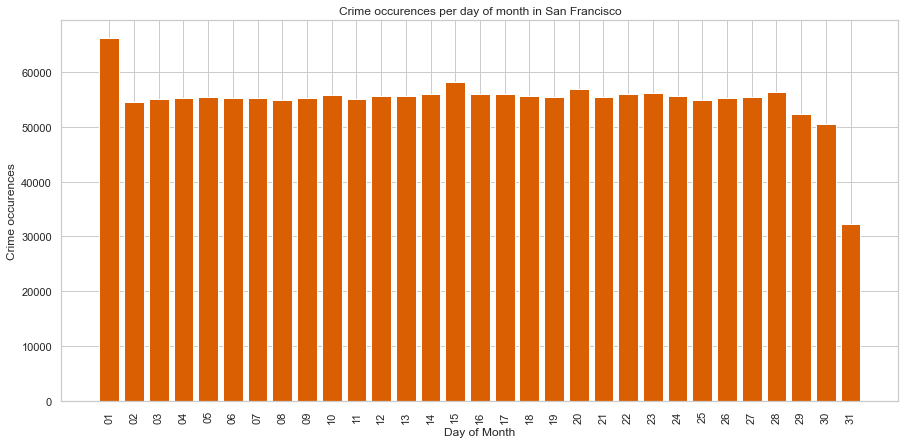

In [ ]:
# get the day information from the Date column
df_crime['Day'] = pd.to_datetime(df_crime['Date']).dt.strftime("%d")
# aggregate the crime occurences on a day of month level 
crime_day_of_month = df_crime.groupby(['Day']).agg(no_crimes_day = pd.NamedAgg(column='IncidntNum', aggfunc=pd.Series.nunique)).reset_index()
# plot the number of crimes per day of the month 
fig = plt.figure(figsize=(15,7))
plt.bar(crime_day_of_month['Day'], crime_day_of_month['no_crimes_day'], color="#d95f02")
plt.xticks(rotation=90)
plt.title("Crime occurences per day of month in San Francisco")
plt.xlabel("Day of Month")
plt.ylabel("Crime occurences")
plt.show()

### Findings
This bar plot shows that the number of crimes is at a steady level around 55000 crimes each day except for the 1. of the month where the number is about 10000 and the 31. of the month where the number is about 20000 crimes lower. This could result in the assumption that the last day of the month is a quite safe day compared to the rest and the first is a more dangerous day which could e.g. lead to the conclusion of the police department that there should be more police on the first day of the month. However when we look at the data in detail it becomes evident that the binned version of the data might be biased and can lead to misconceptions. To illustrate this the time of the day of the month will be investigated further. 

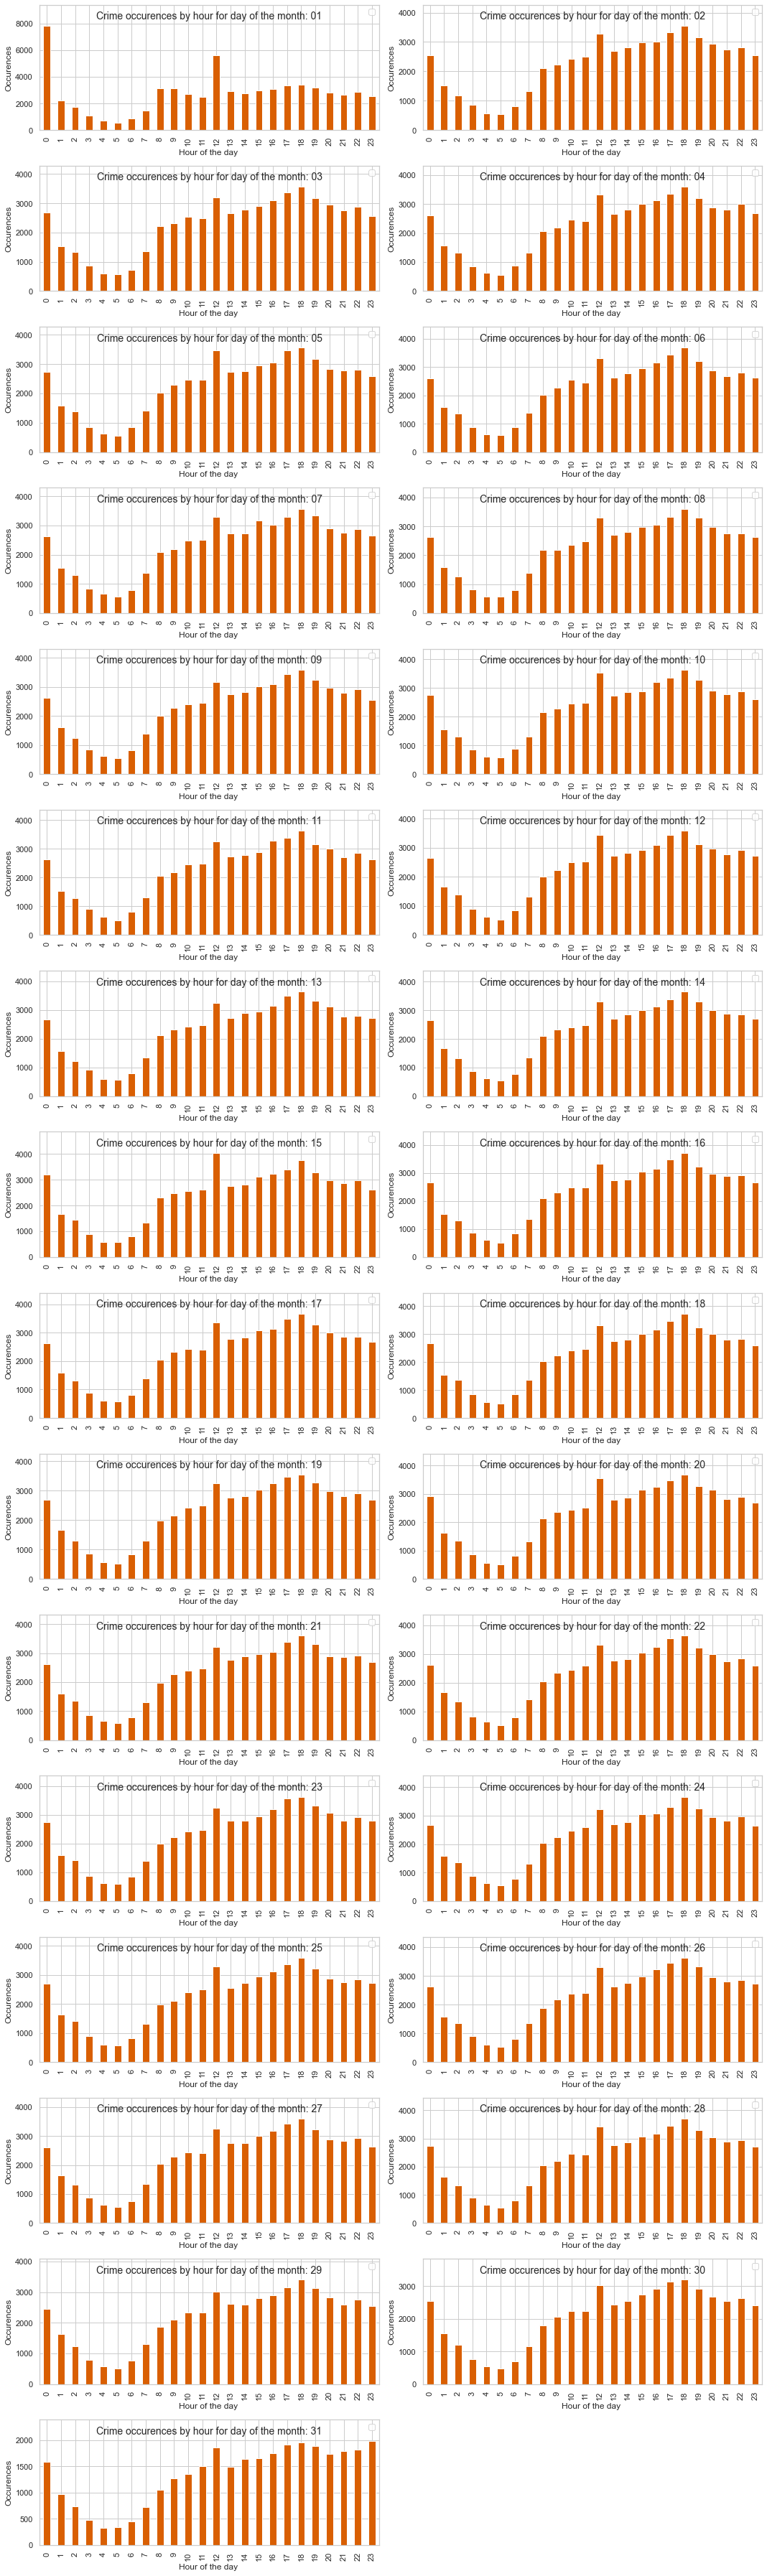

In [ ]:
# prepare the hour
df_crime['Hour'] = pd.to_datetime(df_crime['Time']).dt.hour
# investigate the specific hour of the day to see if the time is distributed similarly over the day of the months or
# if there are varying patterns
crime_day_hour = df_crime.groupby(['Day', 'Hour']).agg(no_crime_hour = pd.NamedAgg(column='IncidntNum', aggfunc=pd.Series.nunique)).reset_index()
# plot the distribution of time for every day of the month
fig = plt.figure()
days = list(crime_day_hour.Day.explode().unique())

# loop thorugh index of list and if list item and dataframe item are the same, plot chart
for day in range(len(days)):
    ax = fig.add_subplot(16, 2, day + 1)
    ax.set_ylim(0, np.max(crime_day_hour[crime_day_hour.Day == days[day]]['no_crime_hour'])*1.2)
    crime_day_hour[crime_day_hour.Day == days[day]].plot(
        kind='bar',  x='Hour', y='no_crime_hour', ax=ax, figsize=(15, 50), label='_nolegend_', color="#d95f02")
    plt.title(f'Crime occurences by hour for day of the month: {days[day]}', y=1.0, pad=-20, fontsize=14)
    ax.set_ylabel('Occurences', fontsize = 12)
    ax.set_xlabel('Hour of the day ', fontsize = 12)

fig.tight_layout()
plt.show()

### Findings
These plots reveal that the most days of the month have a similar distribution of crime over the hours of the day: Crime decreases after midnight and rises again from the early morning to its peak (mostly around 18pm) to decrease slightly until midnight. The first of the month however has its peak in the hour after midnight, drops down after that and has another peak at 12pm (and is pretty stable over the rest of the day). The peak at around 12 is also evident for the other days of the month. 

The peak at the after hour midnight at the first day of the month shows that a lot is happening in the night from the 31. to the the 1 and that these crimes seems to be typically recorded after mignight which would be the humain noise in the data. Events such as New Years Eve or Halloween on the 31. support that this is a night where a lot is happening and also the 01. of January being the day of the year with the most crimes. However just summarizing that the 1. of the month is the most dangerous day of the month might lead to misconcepted conclusion and e.g. a misguided focus of the police.

In [ ]:
#investigate the time further
crime_day_time = df_crime[df_crime.Day=="01"].groupby(['Day', 'Time']).agg(
                no_crime_day_time = pd.NamedAgg(column='IncidntNum', aggfunc=pd.Series.nunique)
                ).reset_index().sort_values(by='no_crime_day_time',ascending=False)
crime_day_time['ratio'] = crime_day_time['no_crime_day_time']/crime_day_time['no_crime_day_time'].sum()

In [ ]:
crime_day_time.head(5)

,Day,Time,no_crime_day_time,ratio
0,01,2022-02-28 00:01:00,6155,0.093070
715,01,2022-02-28 12:00:00,3822,0.057793
475,01,2022-02-28 08:00:00,1866,0.028216
535,01,2022-02-28 09:00:00,1688,0.025524
1075,01,2022-02-28 18:00:00,1313,0.019854


### Findings
This dectection of human noise is also supported by the table above which shows that almost 10% of crimes happening on the first of month are at exactly 00:01 and almost 6% at 12:00 according to the dataset. This also relates back to point 2 above that there crimes are reported at round times.

<a id='referencelist'></a>
## Reference list
Anderson, C. (2015). *Creating a Data-Driven Organization : Practical advice from the trenches*. O'Reilly Media, Inc.

BNP Media. (2019). *Violent Crimes Most Likely to Occur At Night*. Security Magazine. https://www.securitymagazine.com/articles/90384-murder-robbery-and-driving-while-impaired-happen-at-night.

Federal Railroad
Administration. (2020). *Fatal Trespasser Strikes in the United States: 2012-2017.* https://railroads.dot.gov/sites/fra.dot.gov/files/2020-01/Fatal%20Trespasser%20Strikes.pdf.

Fields, L. (2021). *The Health Benefits of Walking and Higher Step Counts*. https://vptfitness.net/2021/03/20/the-health-benefits-of-walking-and-higher-step-counts/.

Galarnyk, M. (2018). *Understanding Boxplots*. Medium. https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51.

Glen, S. (2018). *Choose Bin Sizes for Histograms in Easy Steps + Sturge’s Rule*. Statistics How to. https://www.statisticshowto.com/choose-bin-sizes-statistics/. 

Halls, S. (2019). *BMI difference between men and women*. https://halls.md/bmi-difference-men-women/#:~:text=In%20America%2C%20the%20NHANES%20I%20study%204%20in,to%20ideal%20in%20the%201970%E2%80%99s%20than%20the%201990%E2%80%99s. 

Janert, P. (2010). *Data Analysis with Open Source Tools*. O'Reilly Media, Inc. 

LatLong.net. (2022). *San Francisco, CA, USA*. www.LatLong.net. https://www.latlong.net/place/san-francisco-ca-usa-594.html. 

Law Soup Media (2022). *Alcohol. Guide to Laws About Alcohol in San Francisco*. Law Soup Media. https://sf.lawsoup.org/legal-guides/alcohol/. 

Lehmann, S.,  (2022). *Anscombe*. socialdata2022. https://raw.githubusercontent.com/suneman/socialdata2022/main/files/anscombe.png. 

Lewinson, E. (2019). *Violin plots explained*. Medium. https://towardsdatascience.com/violin-plots-explained-fb1d115e023d. 

Mark, J. (2018). *City prostitution efforts too slow for SF Mission residents*. Mission Local local news for global city. https://missionlocal.org/2018/05/city-anti-sex-trafficking-efforts-too-slow-sf-mission-residents/. 

Massart, D., Smeyers-Verbeke, J., Caprona, X., Schlesier, K. (2005). Visual Presentation of Data: by Means of Box Plots. *LCGC Europe, 18*(4), 215–218. http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.169.9952&rep=rep1&type=pdf. 

Mendelevitch O., cited in Barlow, M. (2014). *Data Visualization: A New Language for Story telling*. O'Reilly Media, Inc.

Press, G. (2016). *Cleaning Big Data: Most Time-Consuming, Least Enjoyable Data Science Task, Survey Says*.  Forbes Media LLC. https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=646503506f63. 

Saeed, M. (2020). *Calculating Pearson Correlation Coefficient in Python with Numpy*. Stack Abuse. https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/. 

Stack Overflow (2017). *Disable iPython Notebook Autoscrolling*. https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling. 

Stack Overflow (2020). *Adding a Title or Text to a Folium Map* https://stackoverflow.com/questions/61928013/adding-a-title-or-text-to-a-folium-map. 

Steimle, S. (2019). *New Laws Forced Sex Workers Back On SF Streets, Caused 170% Spike In Human Trafficking*. BS Broadcasting Inc. https://sanfrancisco.cbslocal.com/2019/02/03/new-laws-forced-sex-workers-back-on-sf-streets-caused-170-spike-in-human-trafficking/. 

The SciPy community. (2022). *scipy.stats.kstest*. Docs scipy. https://docs.scipy.org/doc/scipy/index.html. 

Waskom, M. (2021). *seaborn.boxplot*. Seaborn. https://seaborn.pydata.org/generated/seaborn.boxplot.html. 

Weissgerber, T., Winham, S., Heinzen, E., Milin-Lazovic, J., Garcia-Valencia, O., Bukumiric, Z., Savic, M., Garovic, V., Milic, N. (2019). Reveal, Don’t Conceal: Transforming Data Visualization to Improve Transparency. *Circulation, 140*(18), 1506-1518. https://doi.org/10.1161/CIRCULATIONAHA.118.037777. 

Wickline, M. and the Human-Computer Interaction Resource Network (2001). *Coblis — Color Blindness Simulator*. Colblindor. https://www.color-blindness.com/coblis-color-blindness-simulator/. 

Wiener, Santiago, Allen, Lara, Carrillo, Jones-Sawyer, Obernolte, and Rendon. (2018). *SB-905 Alcoholic beverages: hours of sale.* California legislative information. https://leginfo.legislature.ca.gov/faces/billNavClient.xhtml?bill_id=201720180SB905. 

Wikipedia. (2021a). *Anscombe-Quartett*.  https://de.wikipedia.org/wiki/Anscombe-Quartett. 

Wikipedia. (2021b). *ColorADD*. https://en.wikipedia.org/wiki/ColorADD. 

Wikipedia. (2022a). *Mission District, San Francisco*. https://en.wikipedia.org/wiki/Mission_District,_San_Francisco. 

Wikipedia. (2022b). *Richmond District, San Francisco*. https://en.wikipedia.org/wiki/Richmond_District,_San_Francisco. 

Wikipedia. (2022c). *Tenderloin, San Francisco*. https://en.wikipedia.org/wiki/Tenderloin,_San_Francisco. 

Wikipedia. (2022d). *Violin plot*.  https://en.wikipedia.org/wiki/Violin_plot. 

Wikipedia. (2022e). *Histogram*.https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width. 

World Obesity Federation. (2021). *Obesity and overweight*. WHO. https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight. 

Yanai, I., Lercher, M. (2020). A hypothesis is a liability. *Genome Biology, 21*(231). https://doi.org/10.1186/s13059-020-02133-w*